In [1]:
# for schema in ['football_games','labels','features']:
#     os.mkdir(schema)
#     for tbl in spark.sql(f'SHOW TABLES in {schema}').toPandas()\
#                 [['database','tableName']].apply(lambda x: '.'.join(x), axis=1)\
#                 .values:
#         print(tbl)
#         spark.sql(f'SELECT * FROM {tbl}').toPandas().to_csv(
#                         '{}/{}.csv'.format(*tbl.split('.')), index=False
#                     )

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run ../config/initialize_nospark.ipynb

import pickle as pickle
import json

In [3]:
sys.path.append('../../config')
from mpl_style import *

rcParams['figure.dpi'] = 96
rcParams['figure.figsize'] = (12,8)

In [4]:
import matplotlib as mpl
params_backup = rcParams.copy()

In [5]:
os.chdir(
    '/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/'
)
sys.path.append('model_pipeline/')
from json_validator import validate_model_json, validate_eval_json
from CVData import CVData
from TrainAndScoreModel import TrainAndScoreModel
from EvaluateModel import EvaluationData, EvaluateAndPlot
from Stopwatch import Stopwatch

In [6]:
stopwatch = Stopwatch()

## Load and validate JSON files

In [7]:
model_dict = json.load(open('model_configs/model__0619_test.json','r'))
validate_model_json(model_dict)

plots_dict = json.load(open('model_configs/evaluate__0619_test.json','r'))
validate_eval_json(model_dict, plots_dict)
stopwatch.add('loaded and validated')

Model JSON configuration files passed checks.
Eval dict configuration files passed checks.


In [29]:
# model_dict['strata_cols'] = ['season','did_win']
model_dict['fold_seed'] = 10
model_dict['dataset_seed'] = 10
model_dict['kfolds'] = 500

## Start executing

### Generate CV Sets

##### TODO: get_assignment_dict_permutations... shuffle before slicing! causing bias
* why is more folds taking forever??

In [30]:
cv = CVData(model_dict)
model_data = cv.generate_cv_data()
is_classification = cv.is_classification
stopwatch.add('made CV sets')

WARN: due to number of folds, enumerating 1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938

In [31]:
tmp = model_data['training'].groupby(['season','week_id','fold'])\
    .size()\
    .reset_index()

tmp['season_week'] = tmp[['season','week_id']].apply(lambda x: '{:04d}-{:02d}'.format(*x), axis=1)

tmp.pivot(index='season_week', columns='fold', values=0)\
   .fillna(0)\
   .sum().sum()

tmp.pivot(index='season_week', columns='fold', values=0)\
   .fillna(0)\
   .sum()

tmp.pivot(index='season_week', columns='fold', values=0)\
   .fillna(0)

xyz = tmp.pivot(index='season_week', columns='fold', values=0)\
   .fillna(0)

1531.0

fold
0      1.0
1      5.0
2      3.0
3      5.0
4      5.0
5      5.0
6      5.0
7      5.0
8      4.0
9      2.0
10     3.0
11     4.0
12     3.0
13     5.0
14     6.0
15     3.0
16     2.0
17     4.0
18     5.0
19     3.0
20     1.0
21     3.0
22     3.0
23     4.0
24     2.0
25     4.0
26     4.0
27     2.0
29     2.0
30     2.0
      ... 
468    2.0
469    4.0
471    3.0
472    4.0
473    5.0
474    1.0
475    4.0
476    2.0
477    3.0
478    6.0
479    4.0
480    5.0
481    4.0
482    6.0
483    4.0
484    4.0
485    2.0
486    2.0
487    4.0
488    4.0
489    3.0
490    4.0
491    6.0
492    1.0
494    2.0
495    2.0
496    3.0
497    2.0
498    2.0
499    2.0
Length: 479, dtype: float64

fold         0    1    2    3    4    5    6    7    8    9    ...  489  490  \
season_week                                                    ...             
2007-05      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-06      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-07      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-08      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-09      0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
2007-10      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-11      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-12      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-13      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-14      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
2007-15      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2007-16      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-05      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-06      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-07      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-08      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-09      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-10      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-11      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-12      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-13      0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  0.0   
2008-14      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
2008-15      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0   
2008-16      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
2009-05      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2009-06      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2009-07      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2009-08      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2009-09      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2009-10      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2013-11      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2013-12      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2013-13      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2013-14      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
2013-15      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
2013-16      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-05      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-06      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-07      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-08      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-09      0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
2014-10      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-11      0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-12      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-13      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-14      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2014-15      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   


#### leaving off: why is fold 0 maxed at only 1??

### Train/Score

In [32]:
model = TrainAndScoreModel(model_dict, is_classification)
model.cv_train_and_score(model_data['training'], 
               model_data['scoring_only'])
stopwatch.add('trained and scores')

##### Score holdout

In [33]:
holdout = model.score_holdout(model.model_objects['full'], model_data['holdout'])

### Method 1: Easy Plot All

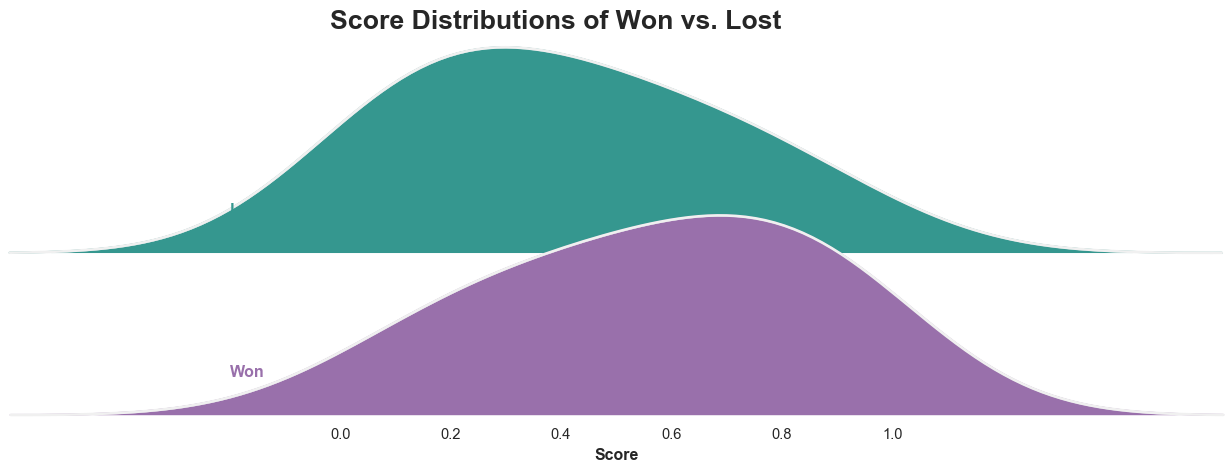

<Figure size 1152x768 with 0 Axes>

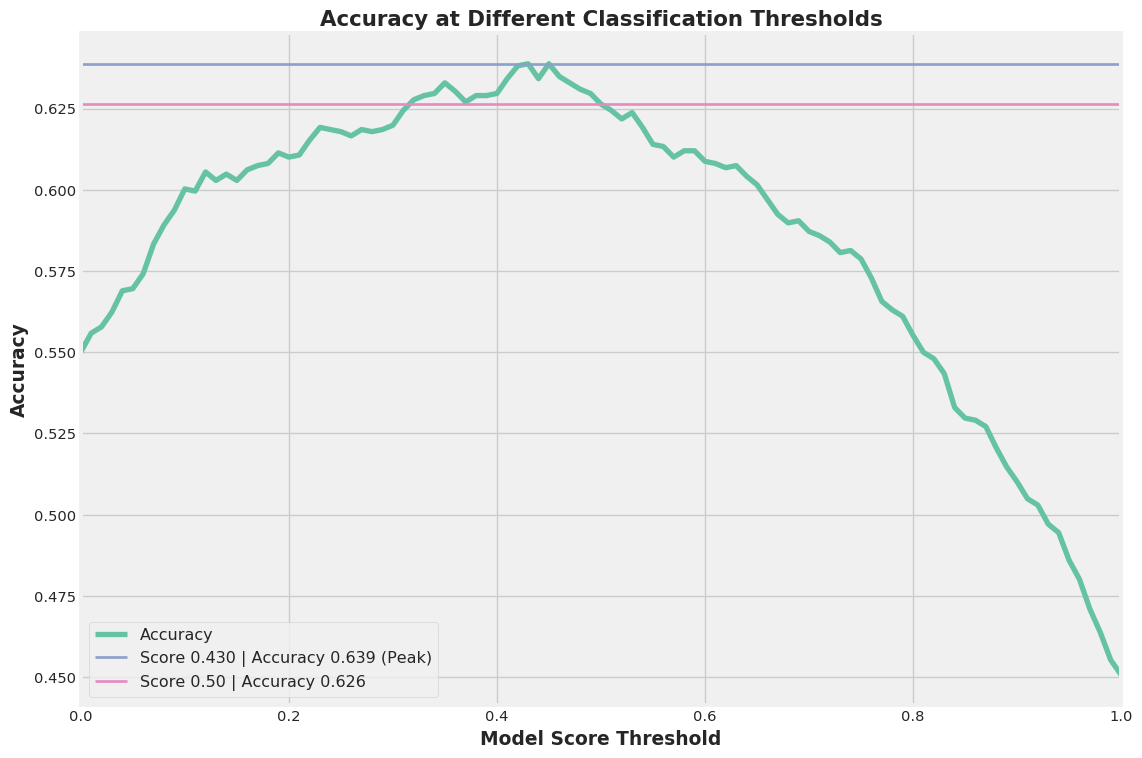

<Figure size 1152x768 with 0 Axes>

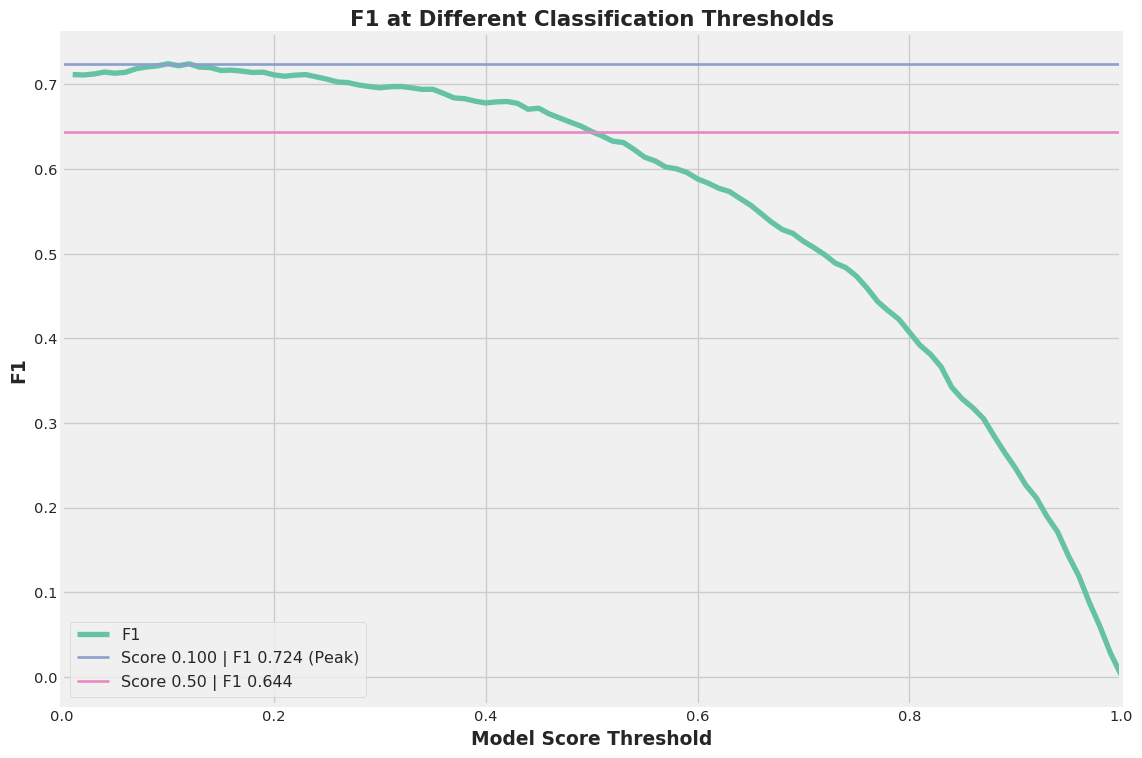

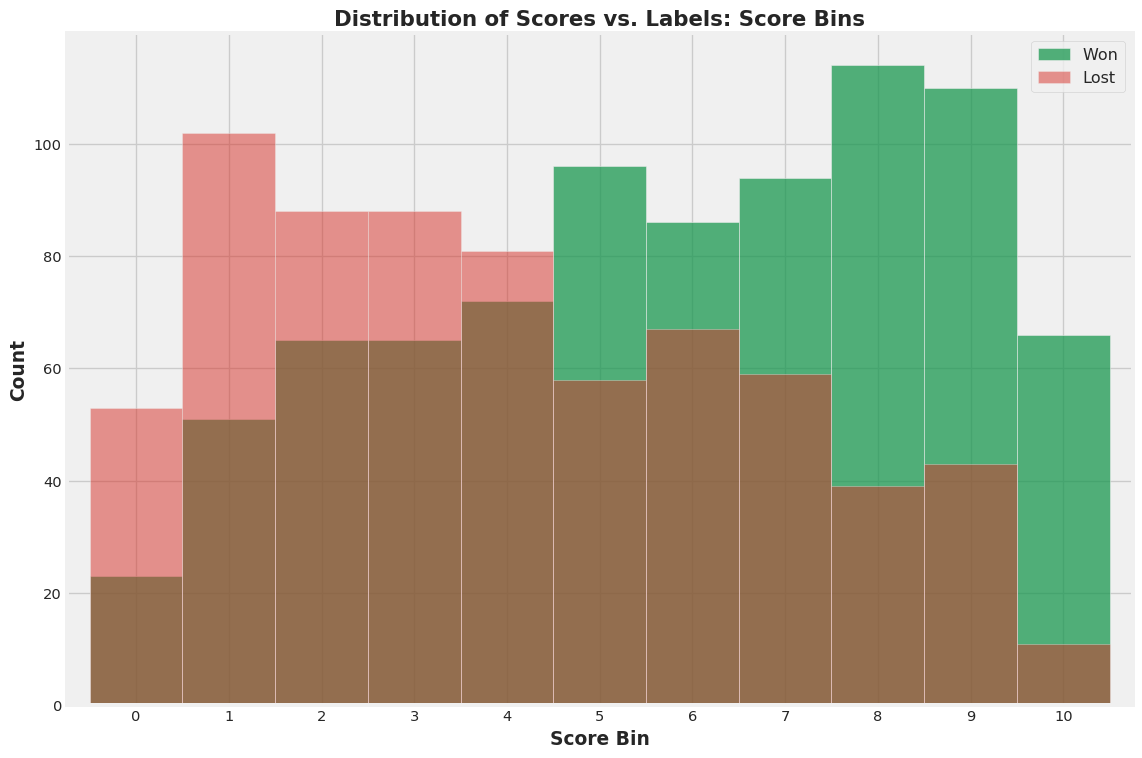

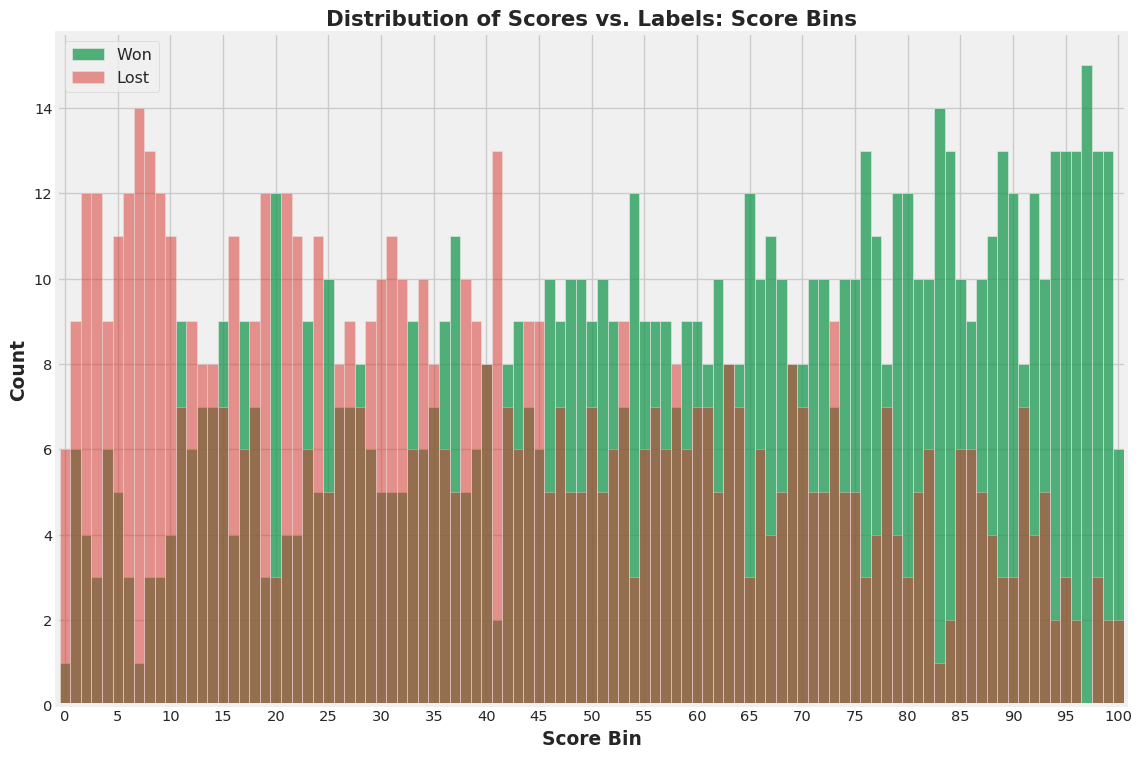

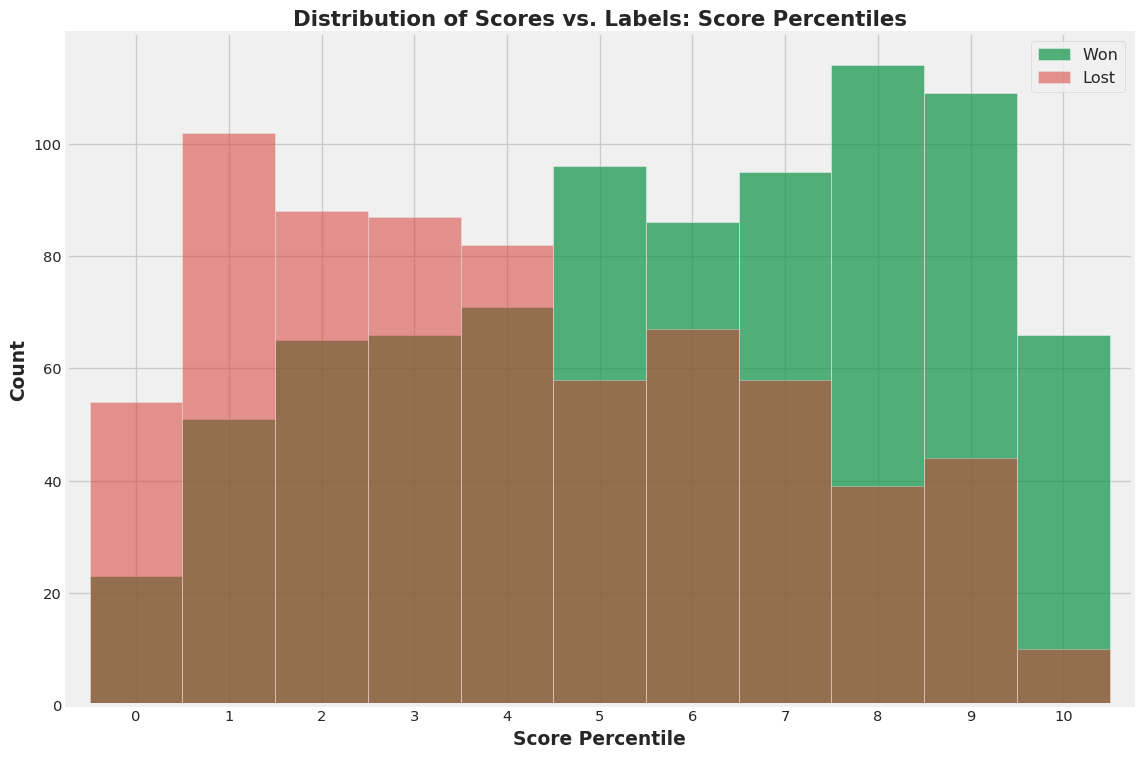

<Figure size 1152x768 with 0 Axes>

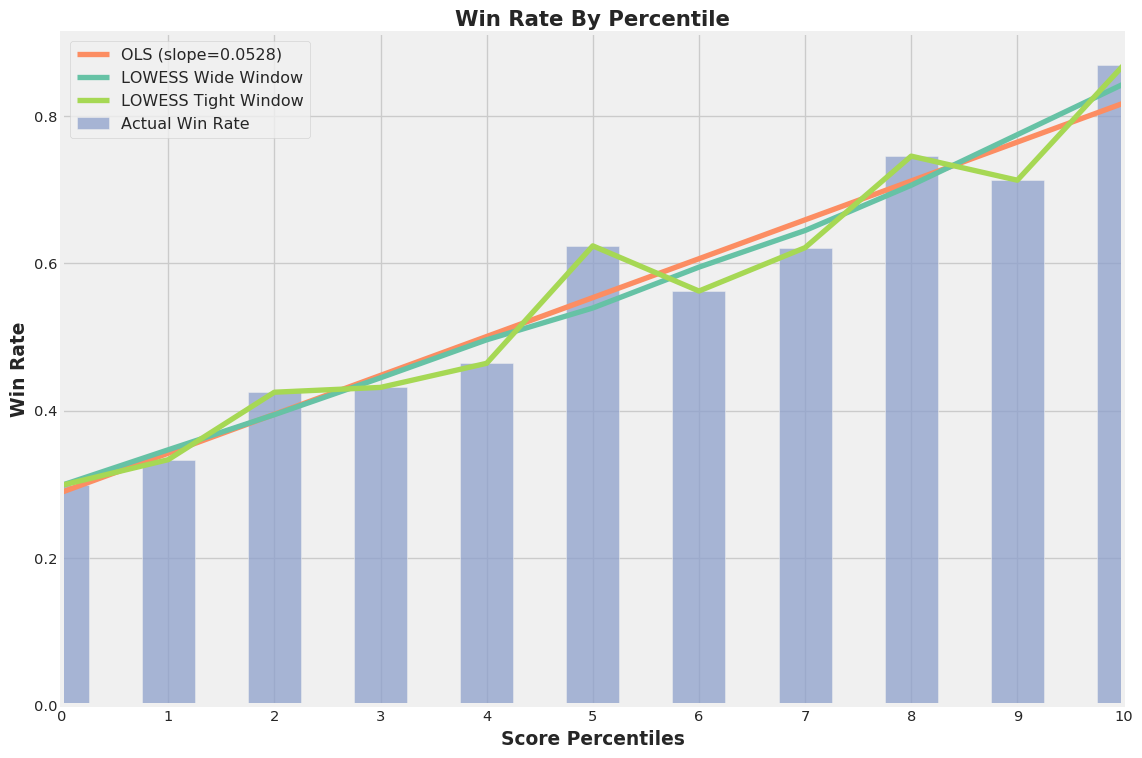

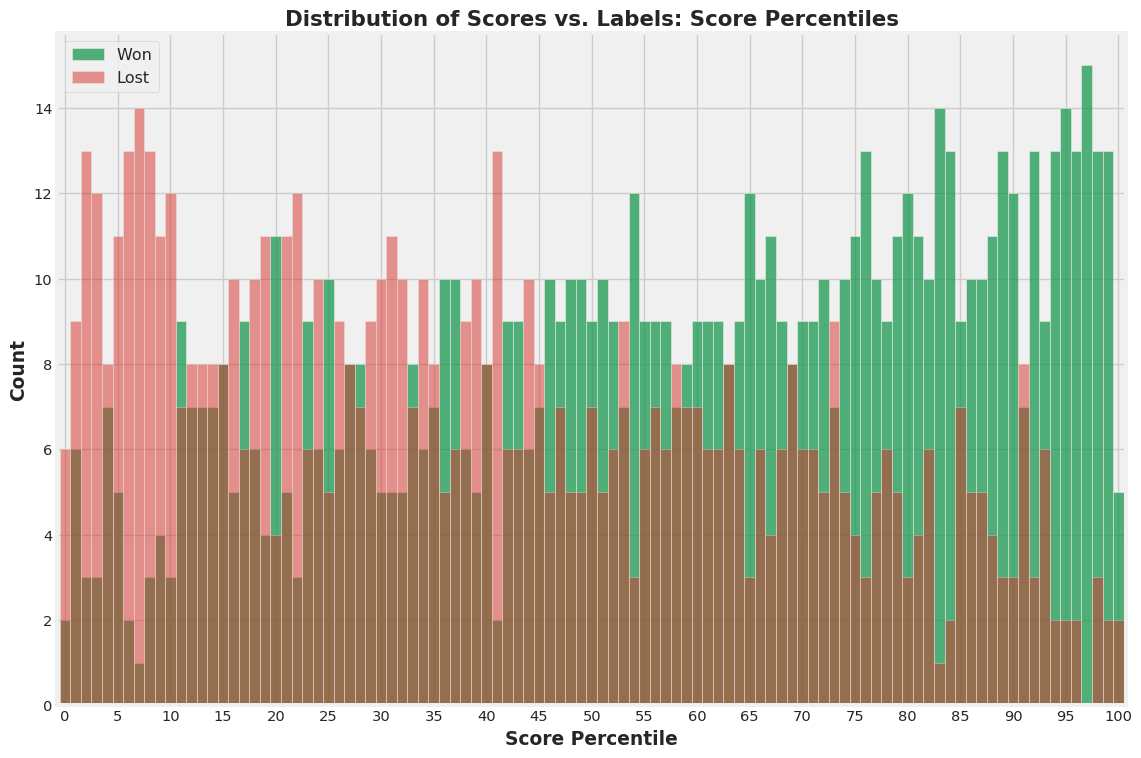

<Figure size 1152x768 with 0 Axes>

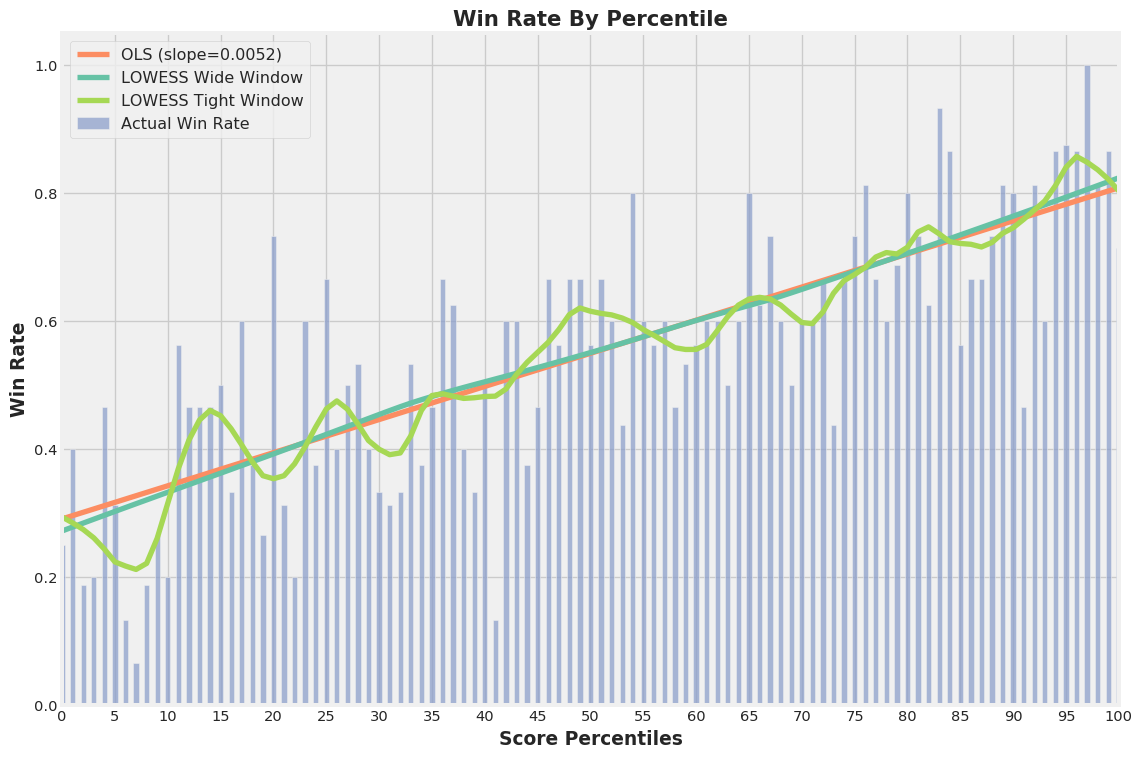

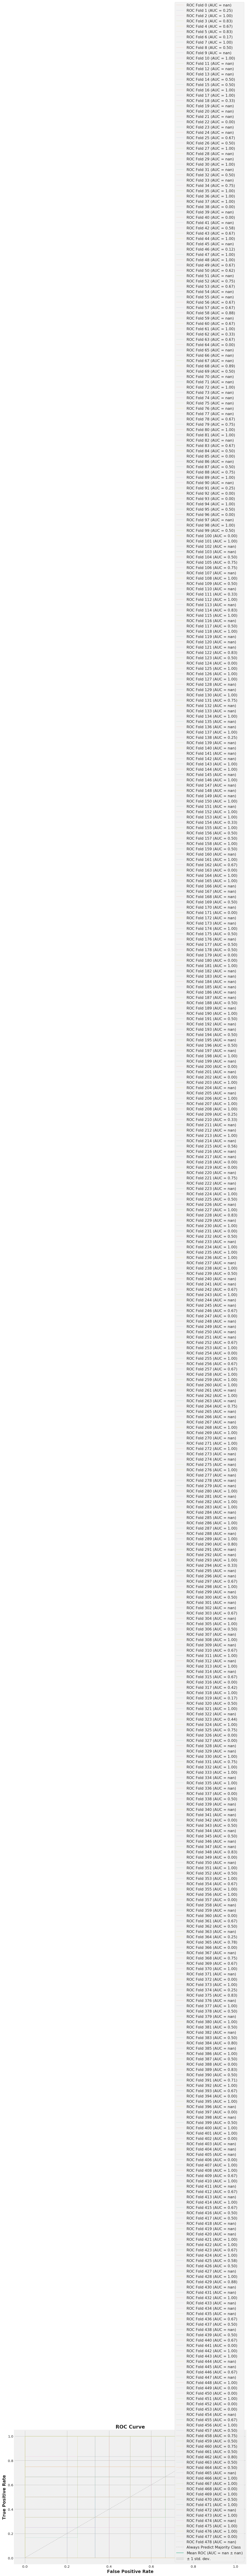

<Figure size 1152x768 with 0 Axes>

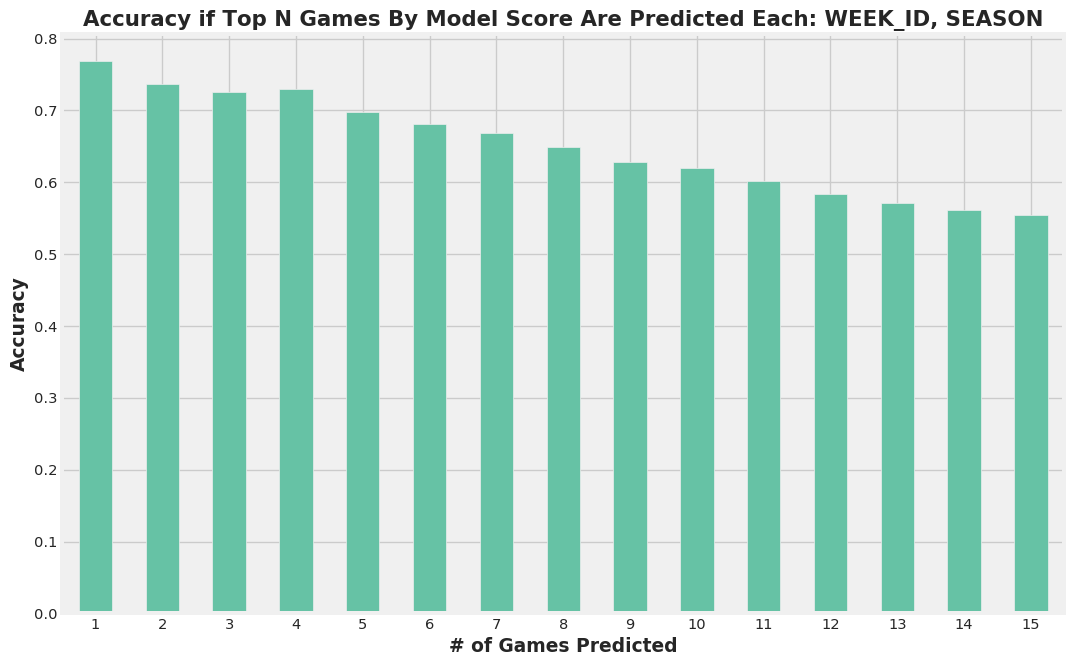

<Figure size 1152x768 with 0 Axes>

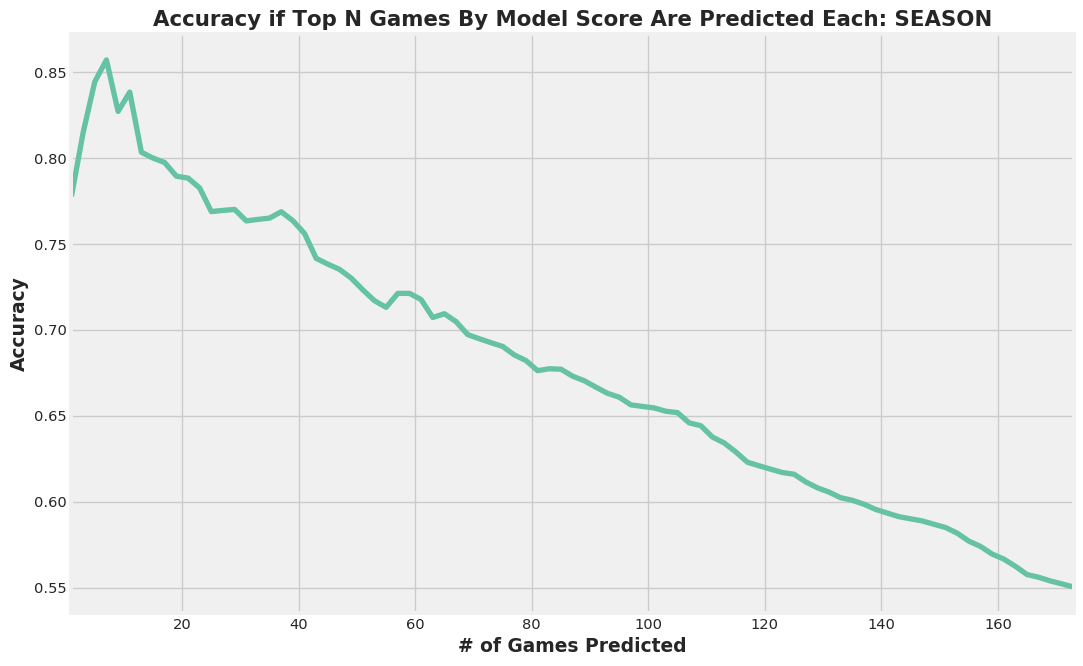

<Figure size 1152x768 with 0 Axes>

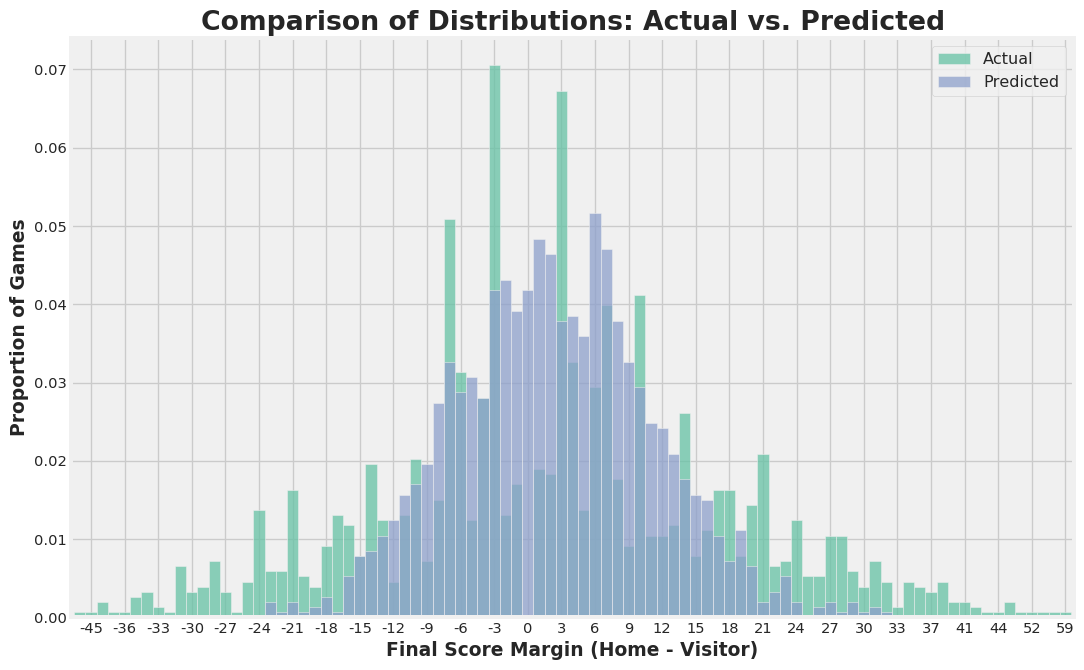

<Figure size 1152x768 with 0 Axes>

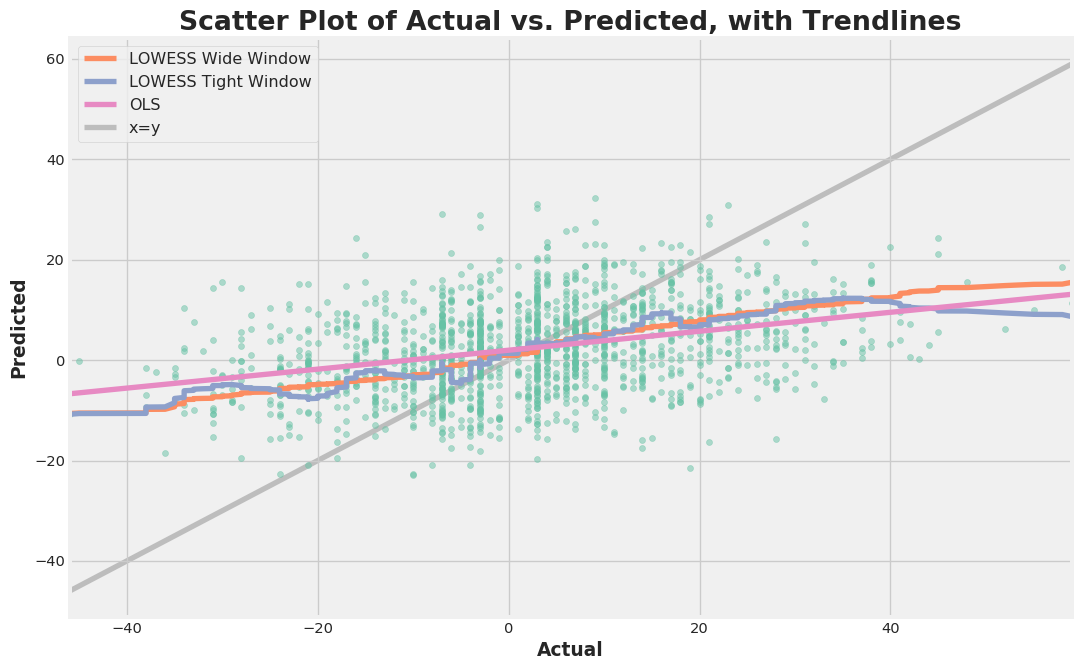

<Figure size 1152x768 with 0 Axes>

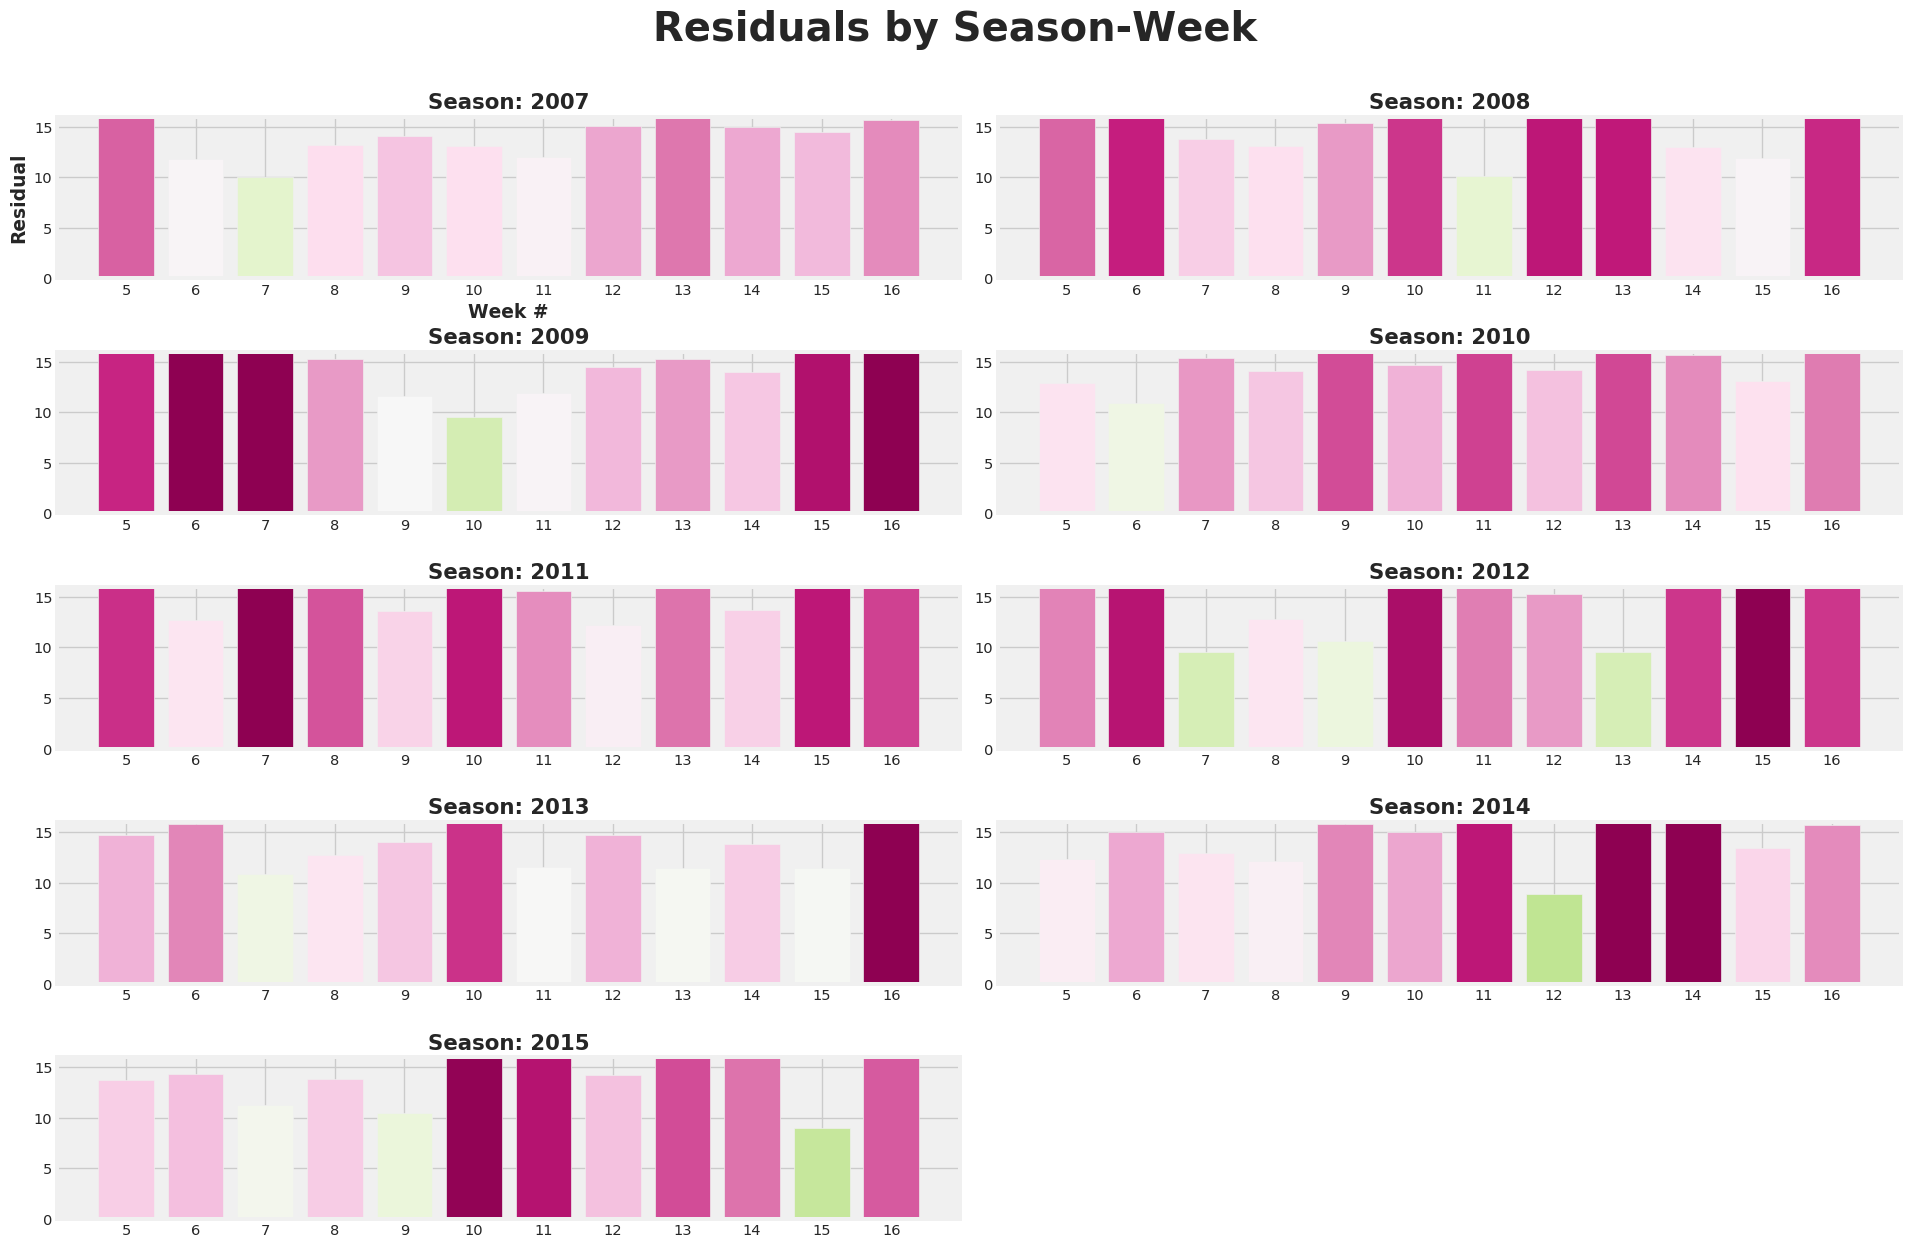

<Figure size 1152x768 with 0 Axes>

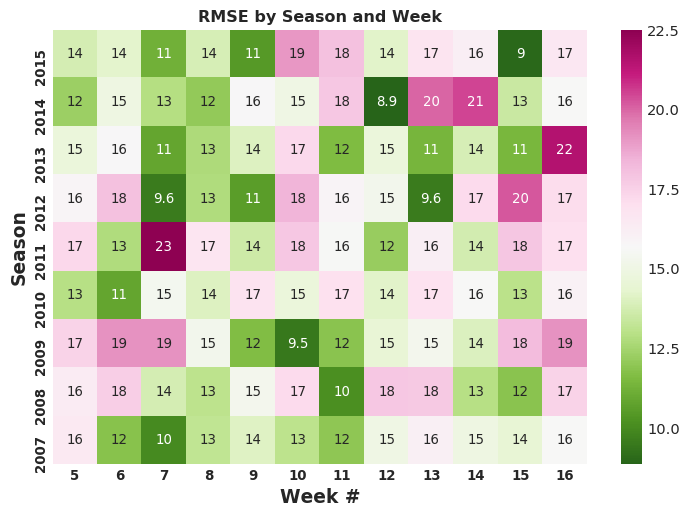

<Figure size 1152x768 with 0 Axes>

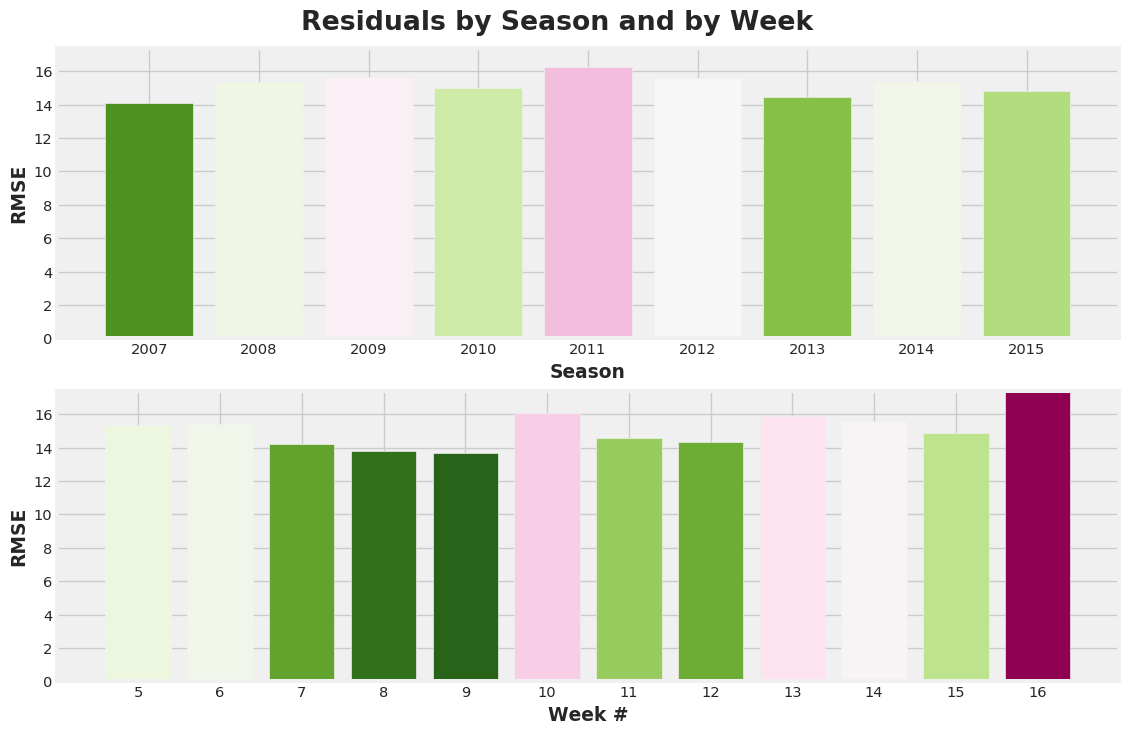

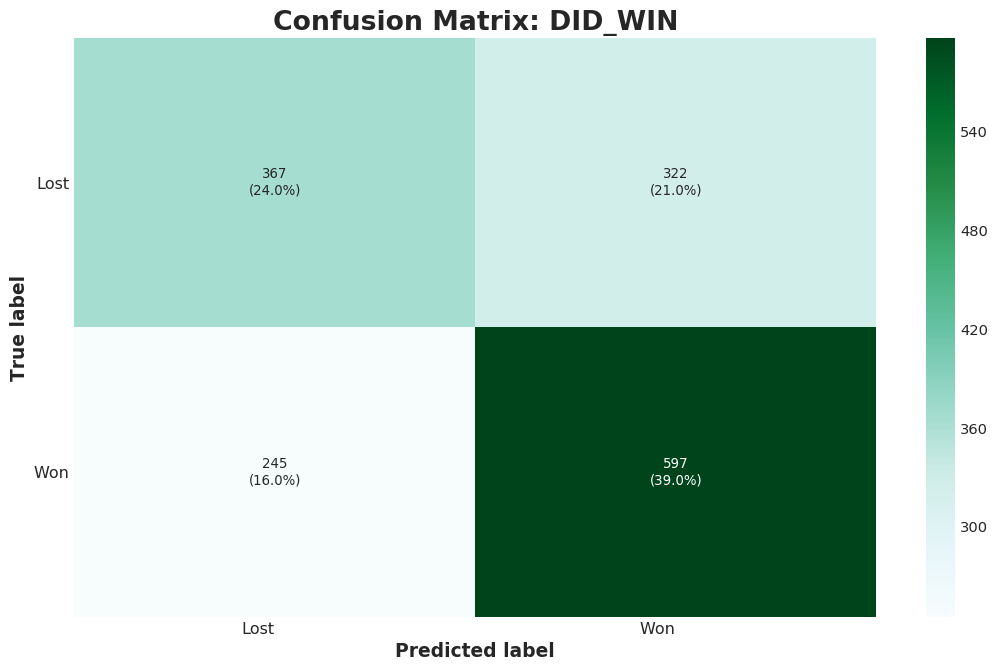

IndexError: too many indices for array

<Figure size 1152x768 with 0 Axes>

In [34]:
plots_dict['save_plots'] = False
plots_dict['save_stats'] = True
plot = EvaluateAndPlot(
    plots_dict, model.cv_scores, model.is_classification
)
    
plot.plot_all(model.model_dict, model.cv_scores, model.model_objects)

stopwatch.add('ran plot_all and saved')

### Method 2: Get Data and (optionally) Plots Second

#### Manual Data

In [18]:
evalu = EvaluationData(plots_dict, model.cv_scores)

acc_dfs = {}
for metric in plots_dict['threshold_metrics']:
    acc_dfs[metric] = evalu.get_threshold_data(metric)

ridge_df = evalu.get_ridge_data()

mean_auc = evalu.get_mean_auc()

bins_dfs = {}
for bin_type in plots_dict['bin_types']:
    bins_dfs[bin_type] = {}
    for nbins in plots_dict['plot_bins']:
        bins_dfs[bin_type][nbins] = evalu.get_bins_data(bin_type, nbins)
    
acc_topn = {}
for col_range in plots_dict['accuracy_at_topn'].items():
    acc_topn[col_range[0]] = evalu.get_accuracy_at_topn(*col_range)
    
residuals, mean_residuals, pivot_residuals = plot.get_residuals_season_week_mean()
scatter = plot.get_scatter_data()
vals = plot.get_distributions_data()
confusion_df = plot.get_confusion_matrix_data('label', 'binary_pred')
    
importances = plot.get_feature_importances(model.model_objects['full'])
shap_df = plot.get_shap_vals(model.model_dict, model.model_objects)

stopwatch.add('evaluate: data-only')    

#### Manual plot

In [20]:
import shap

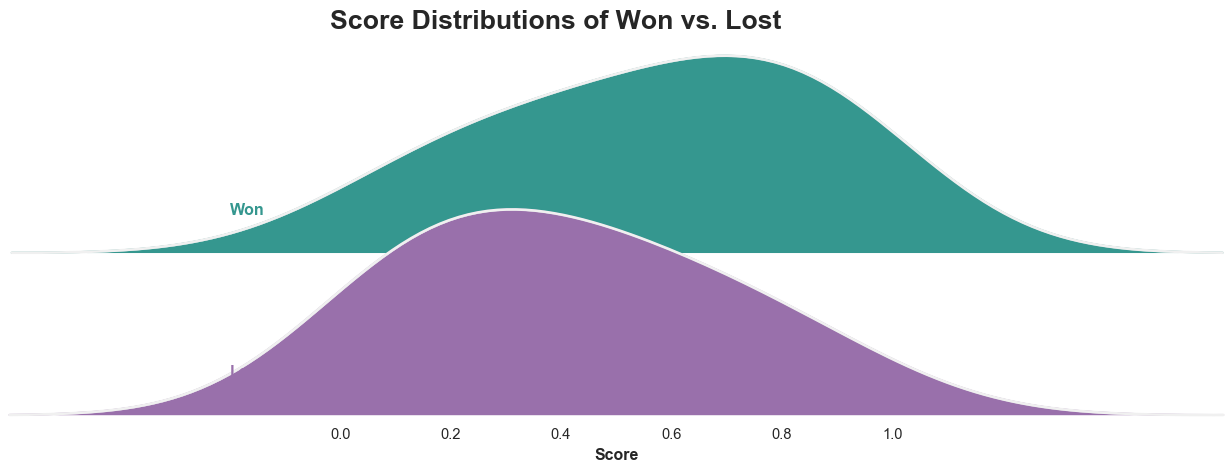

<Figure size 1152x768 with 0 Axes>

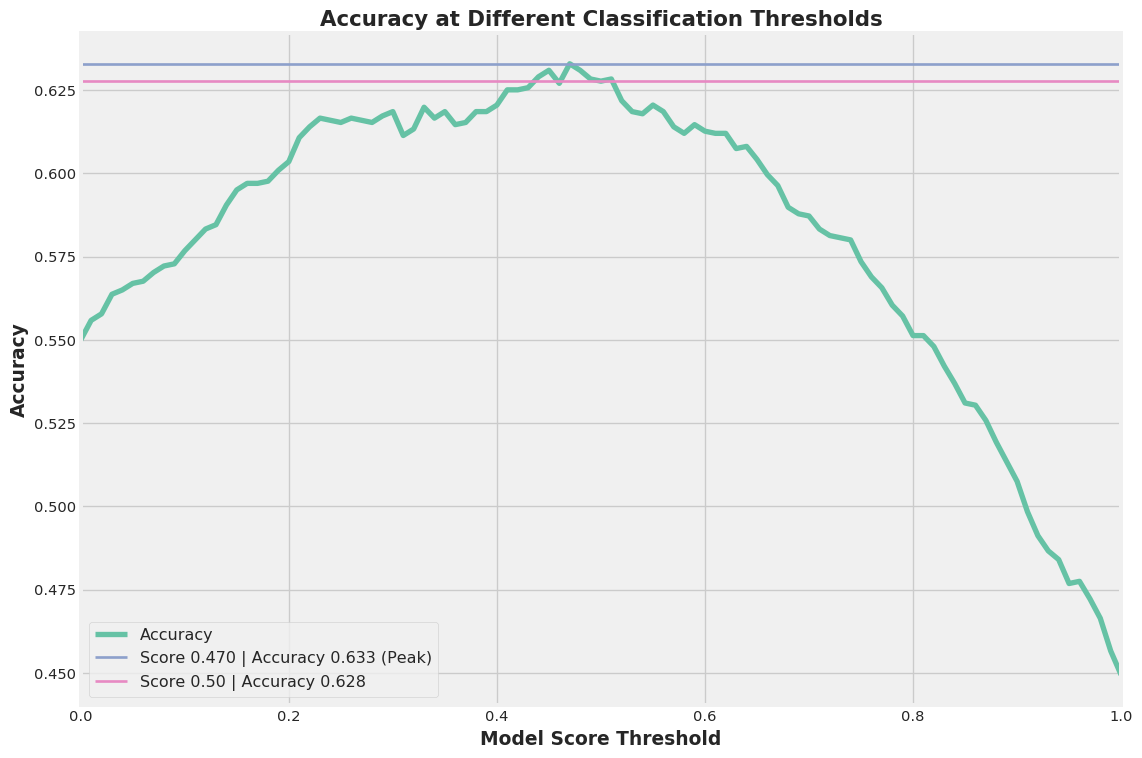

<Figure size 1152x768 with 0 Axes>

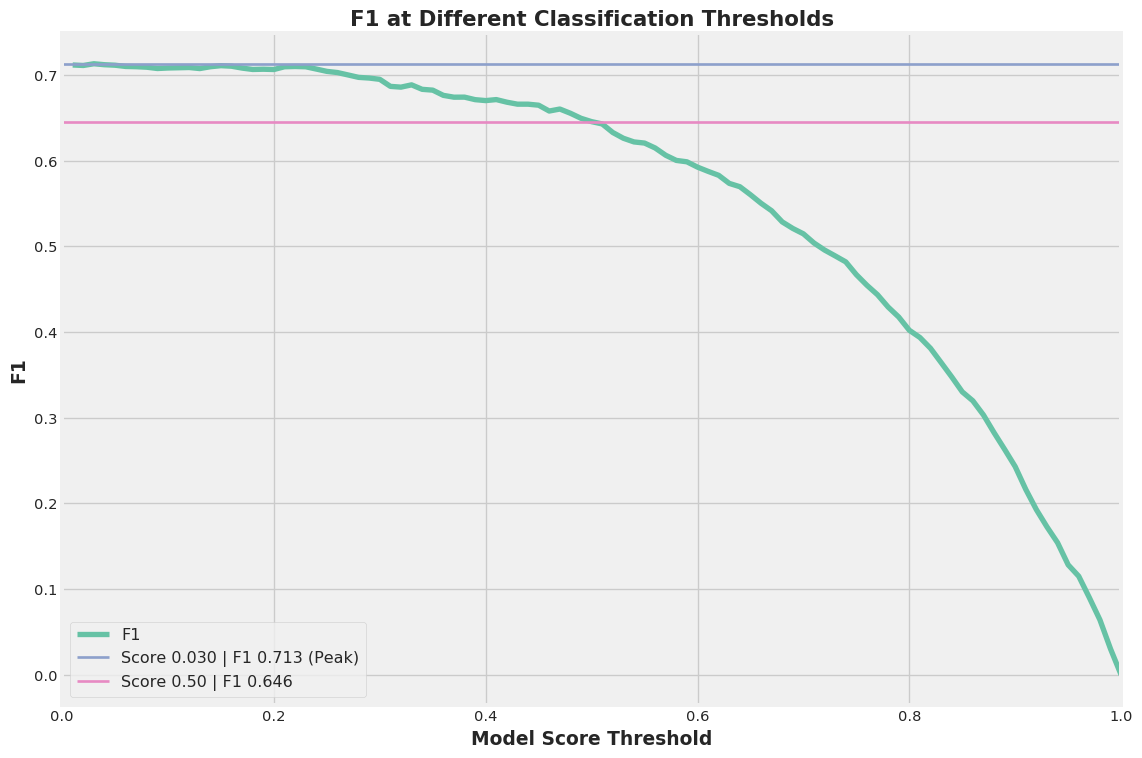

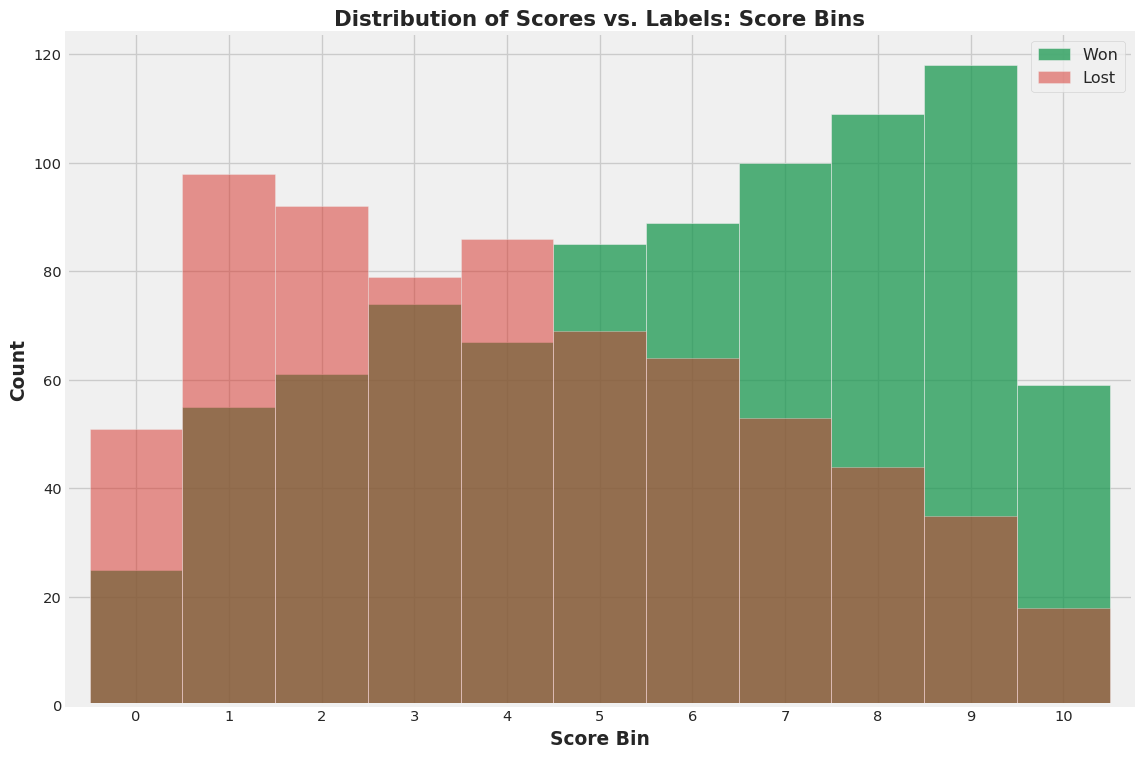

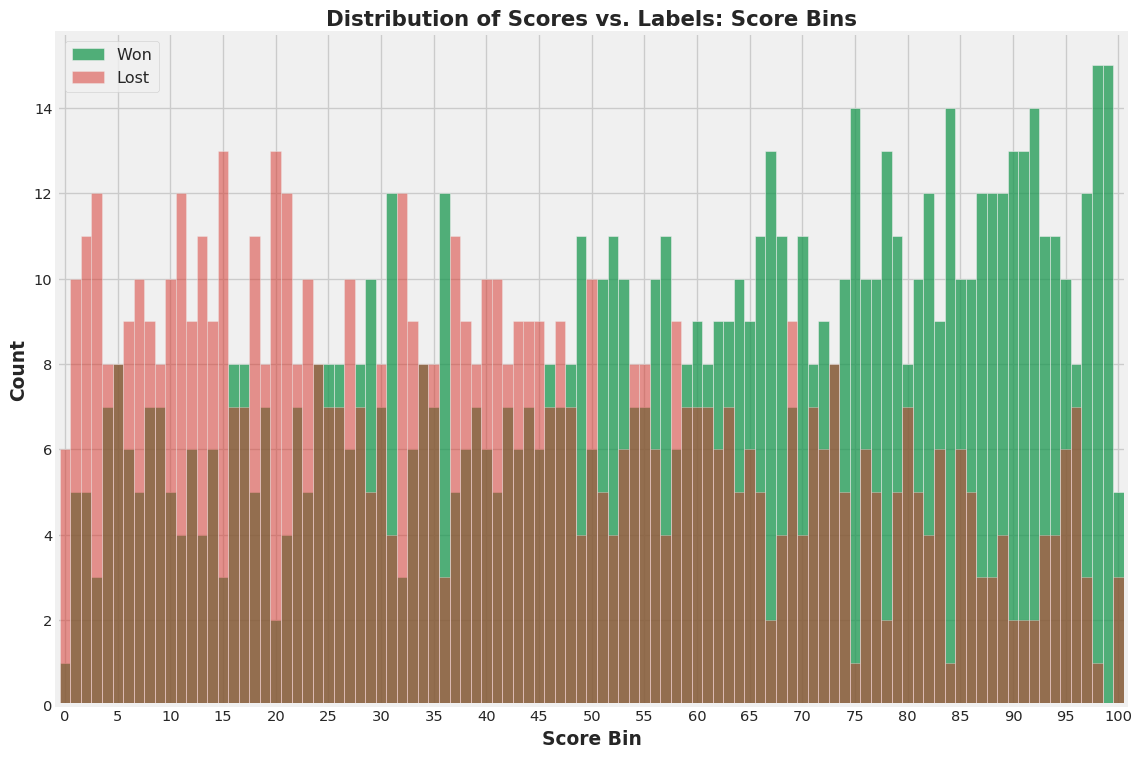

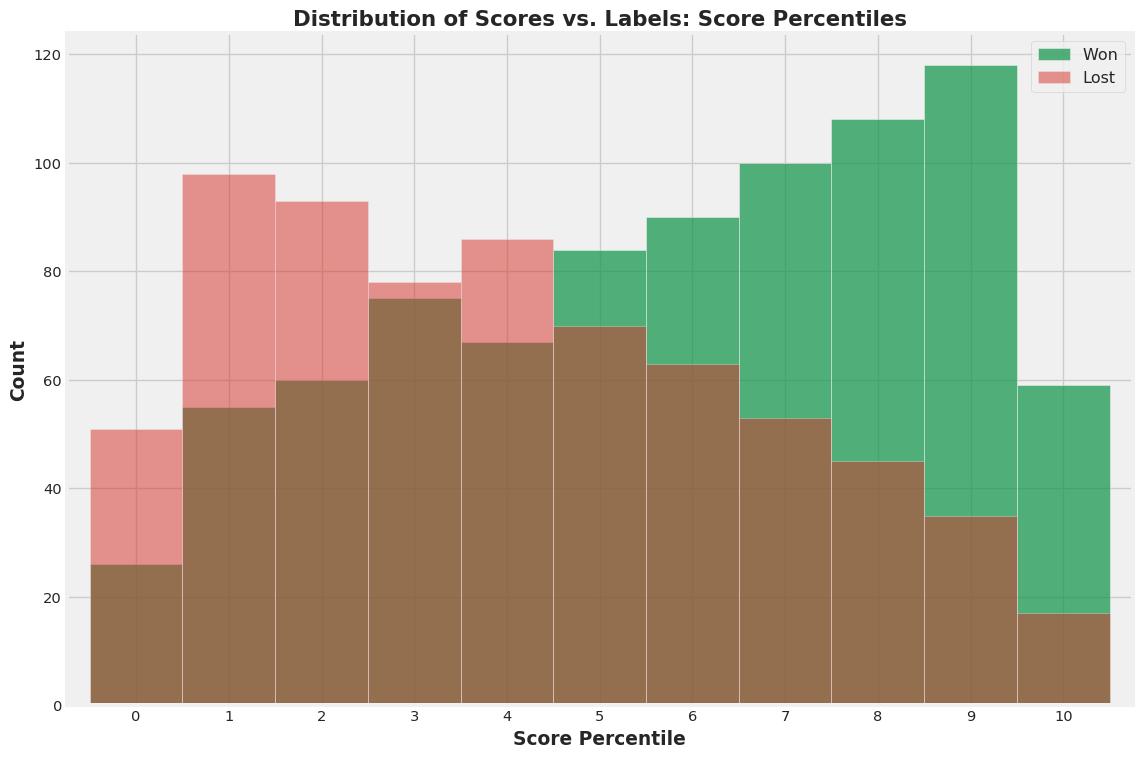

<Figure size 1152x768 with 0 Axes>

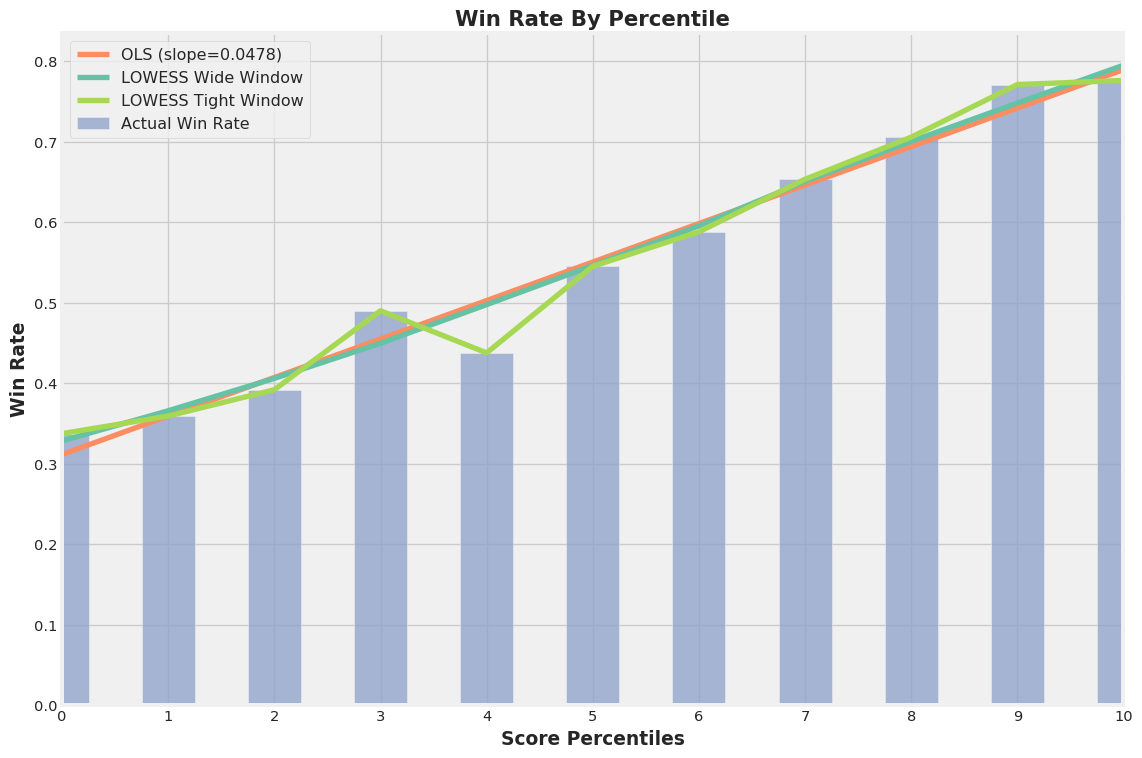

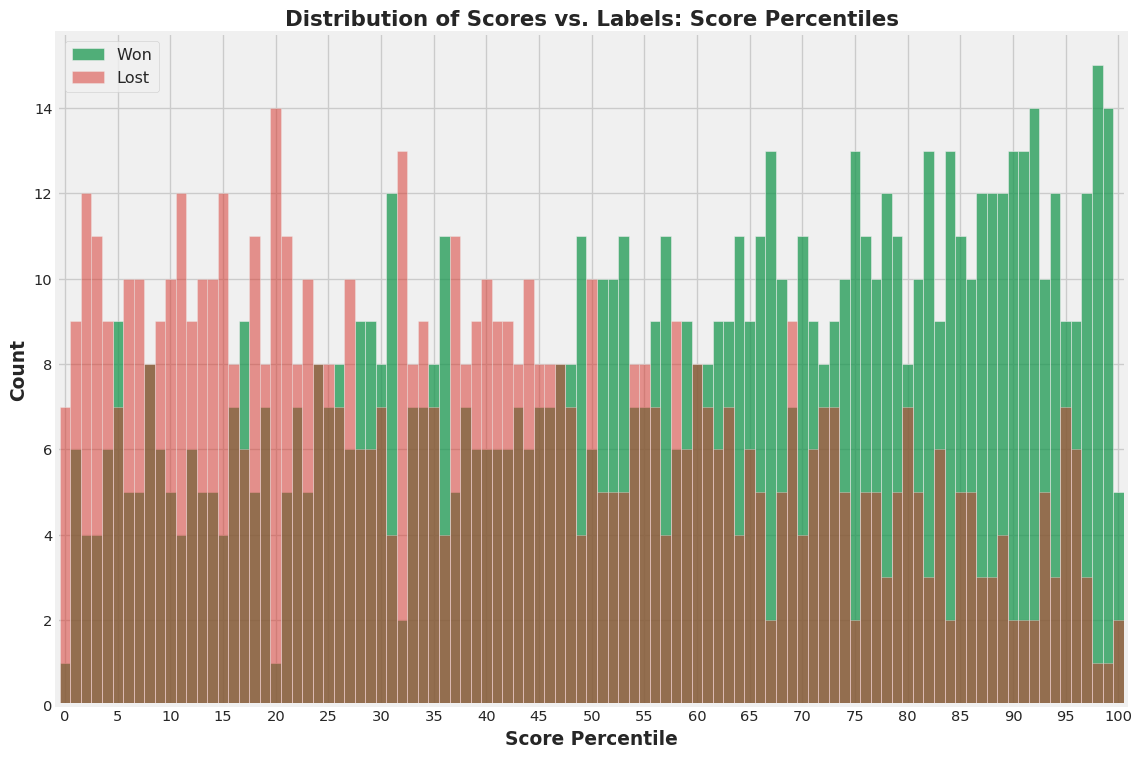

<Figure size 1152x768 with 0 Axes>

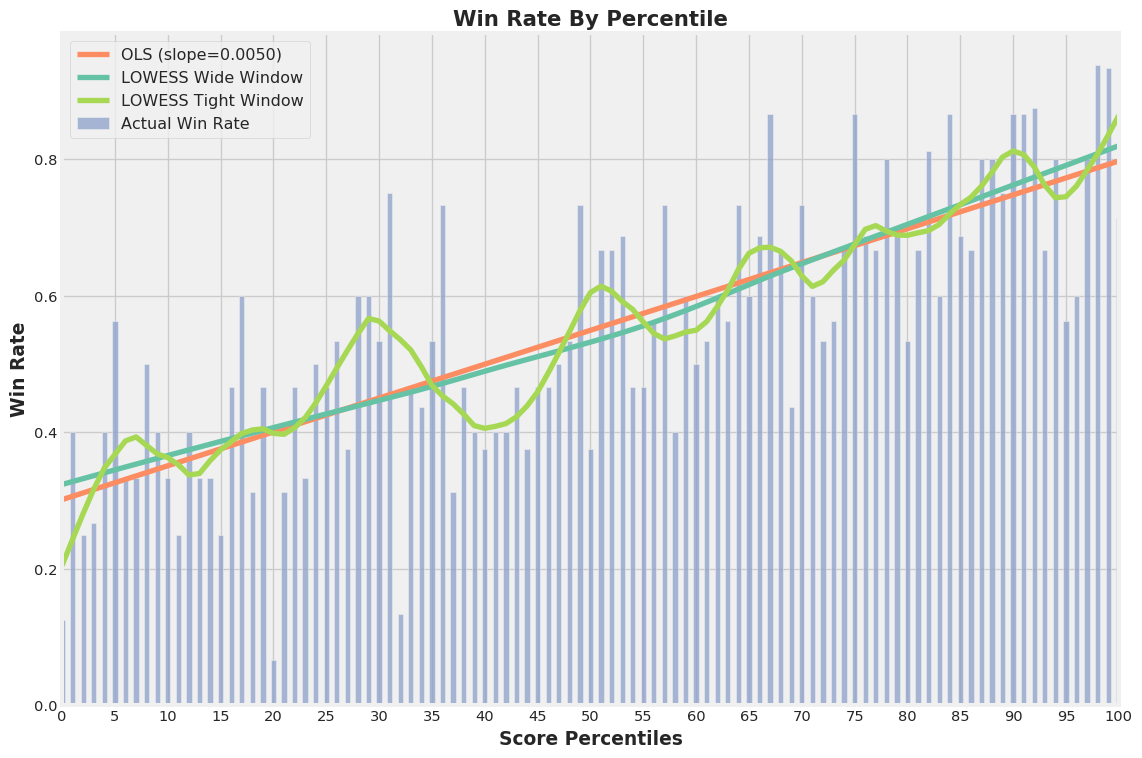

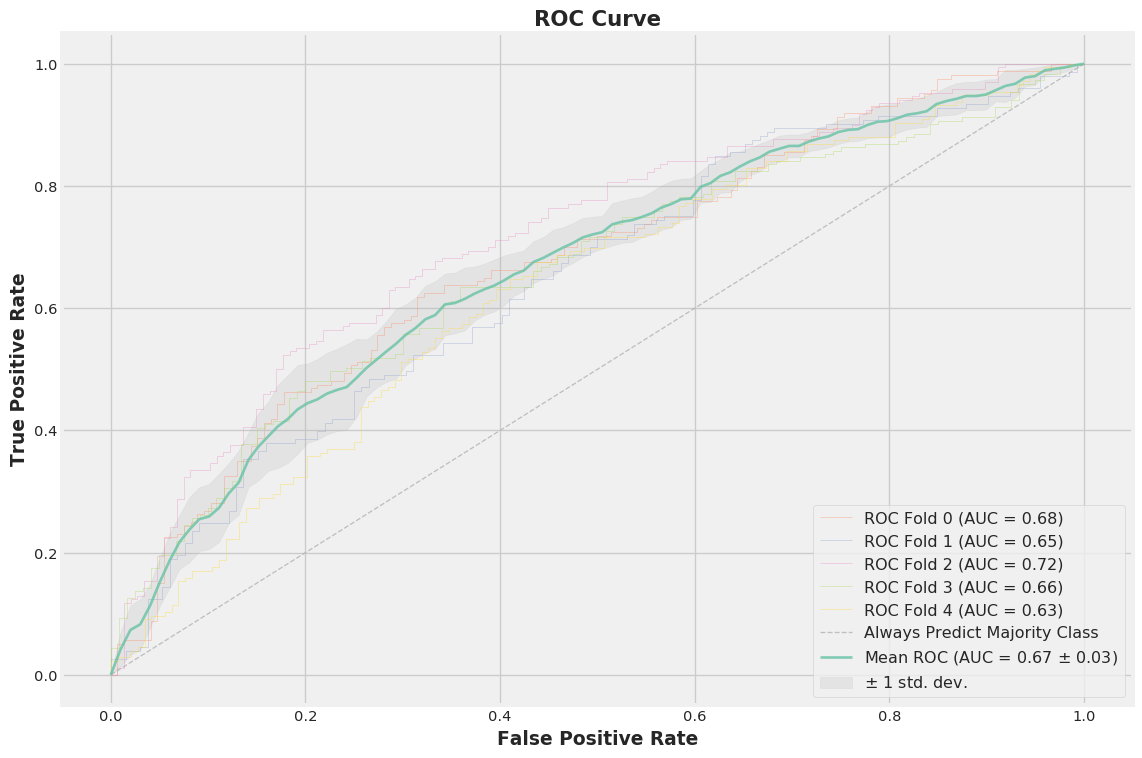

<Figure size 1152x768 with 0 Axes>

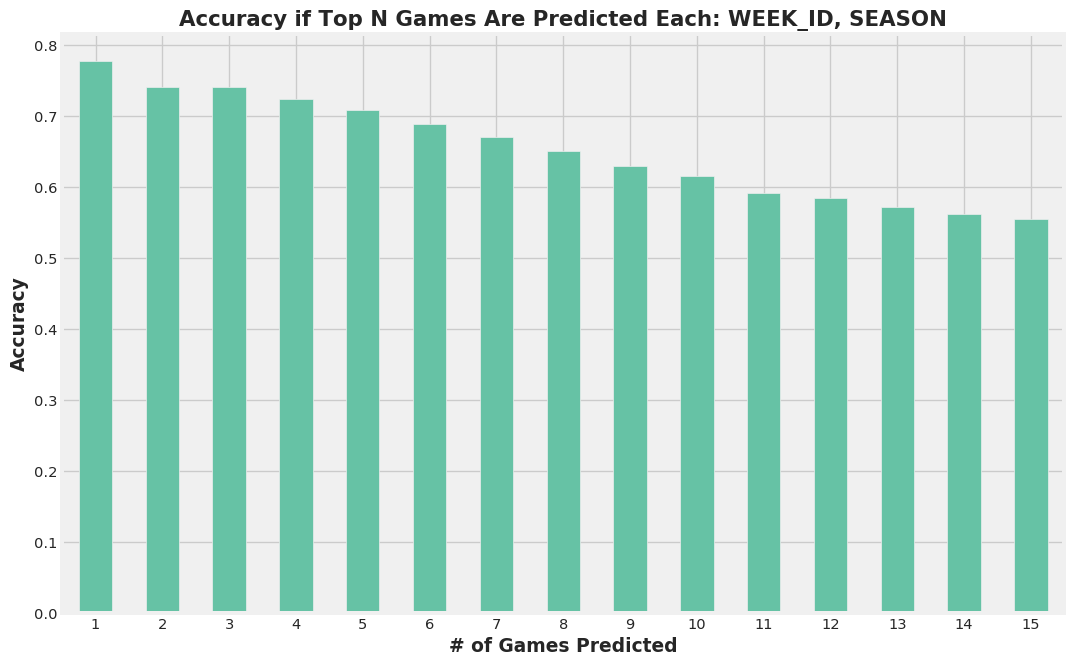

<Figure size 1152x768 with 0 Axes>

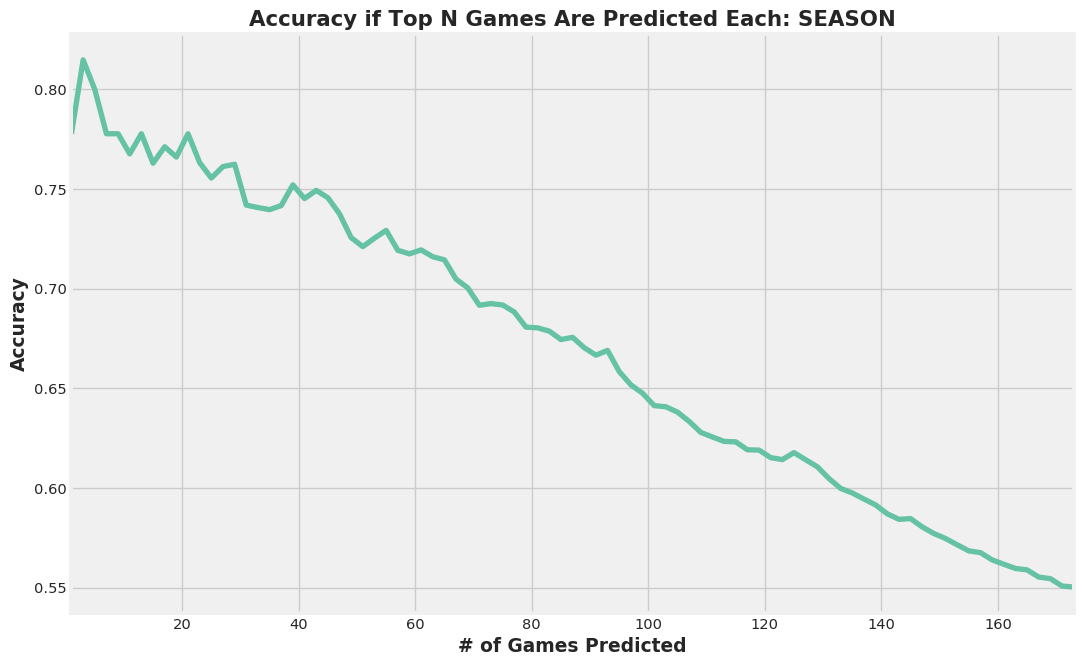

<Figure size 1152x768 with 0 Axes>

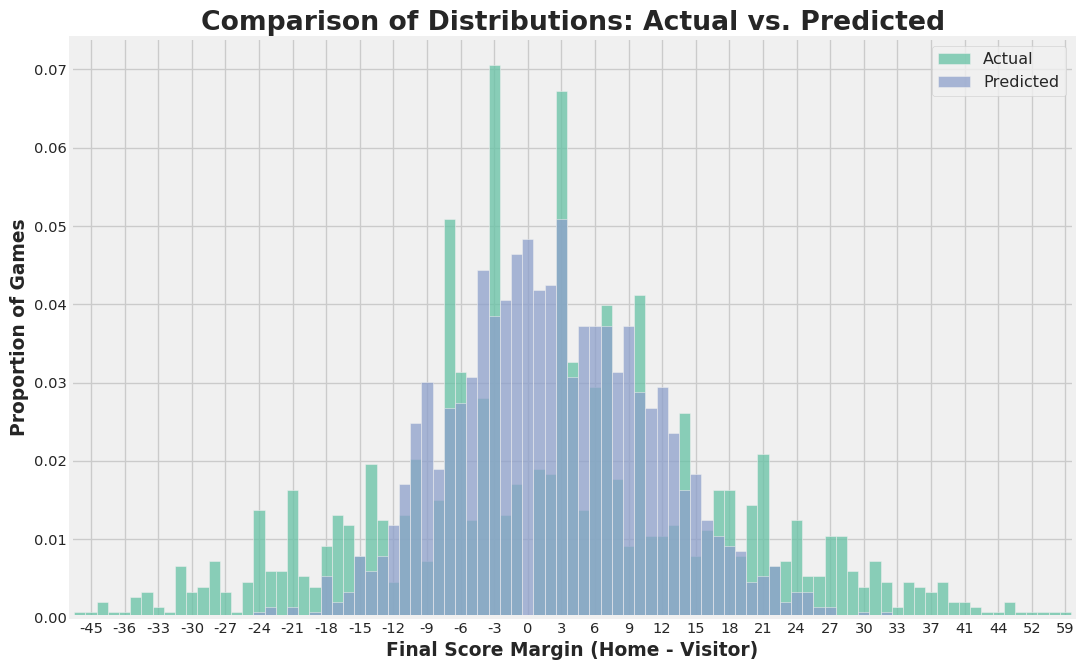

<Figure size 1152x768 with 0 Axes>

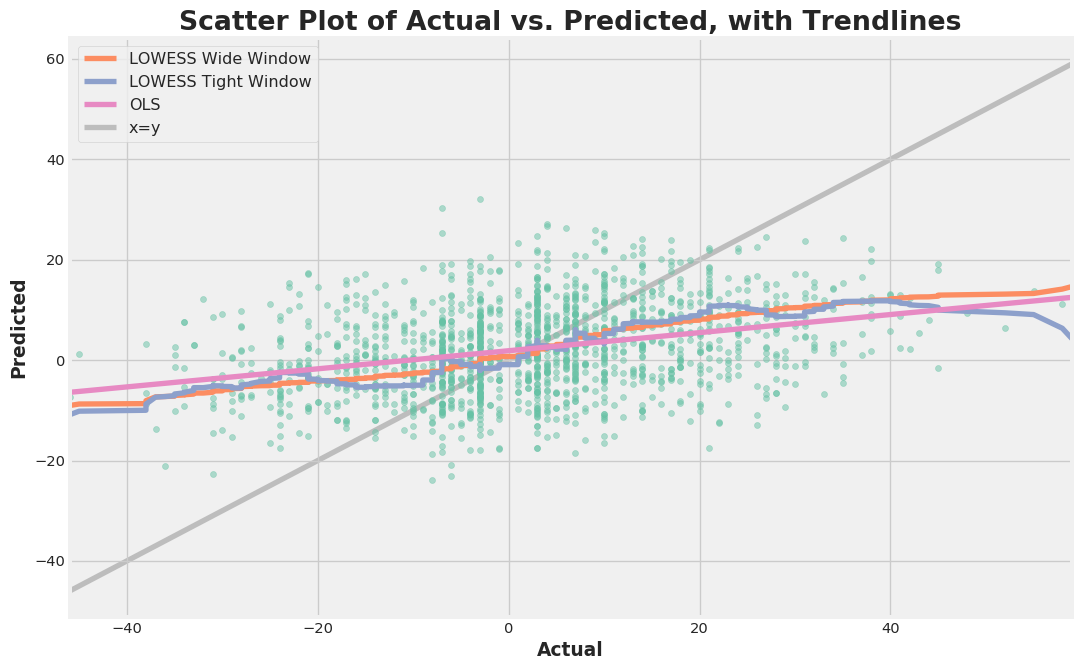

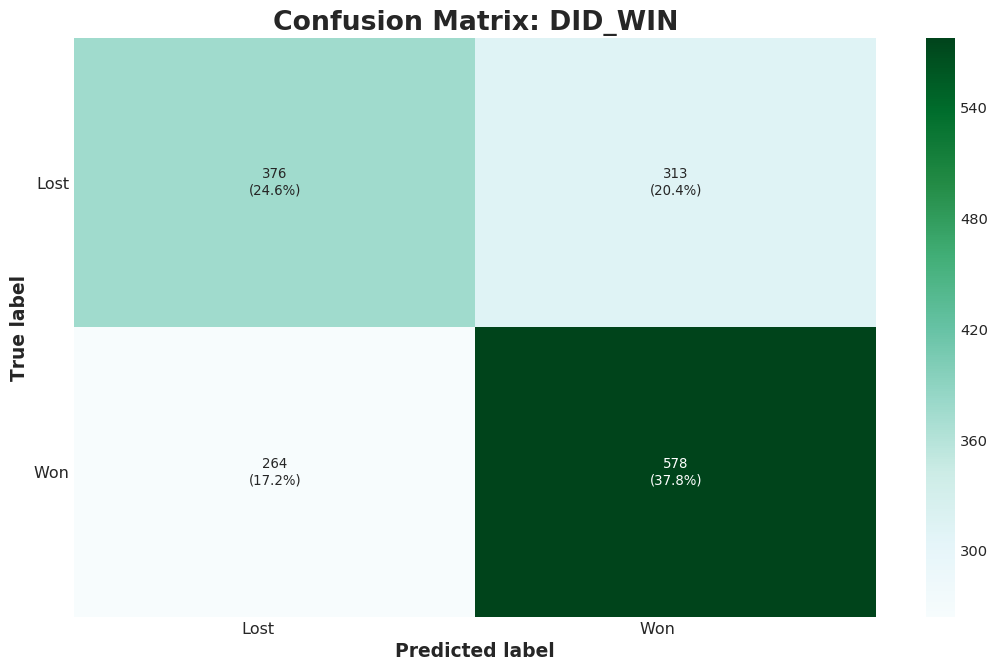

<Figure size 1152x768 with 0 Axes>

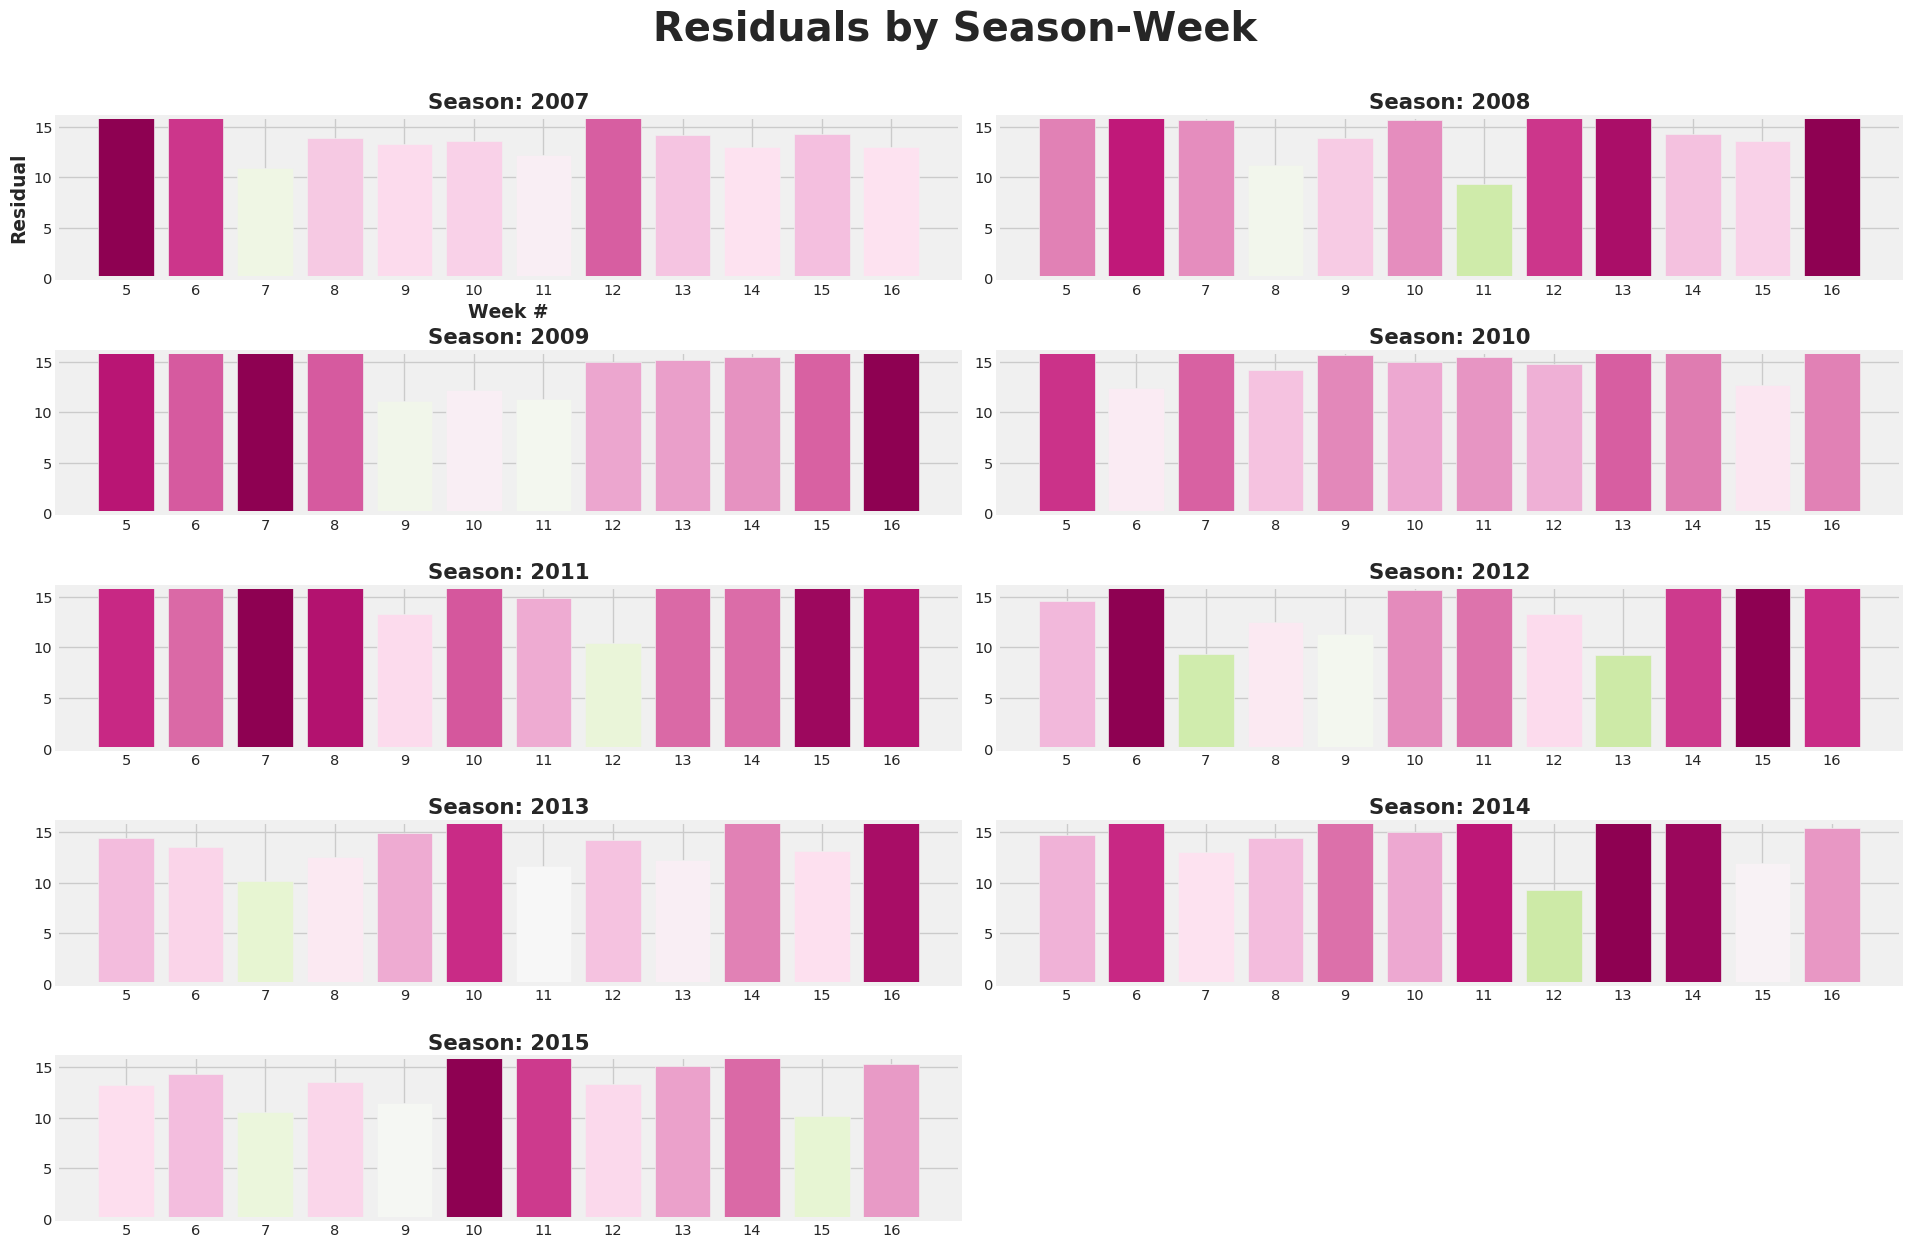

<Figure size 1152x768 with 0 Axes>

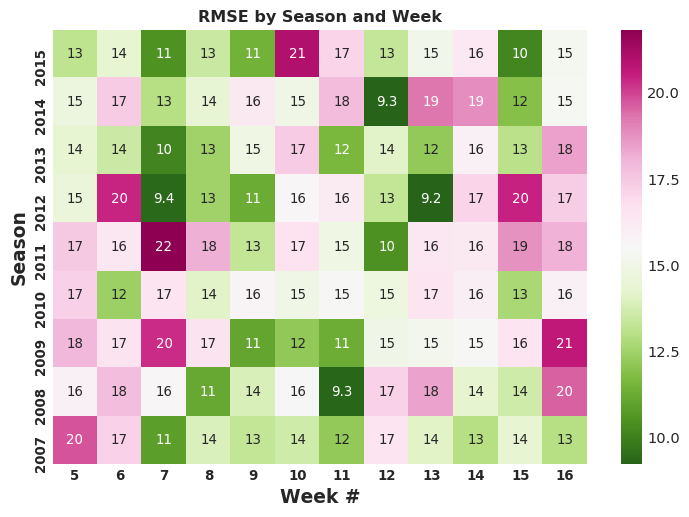

<Figure size 1152x768 with 0 Axes>

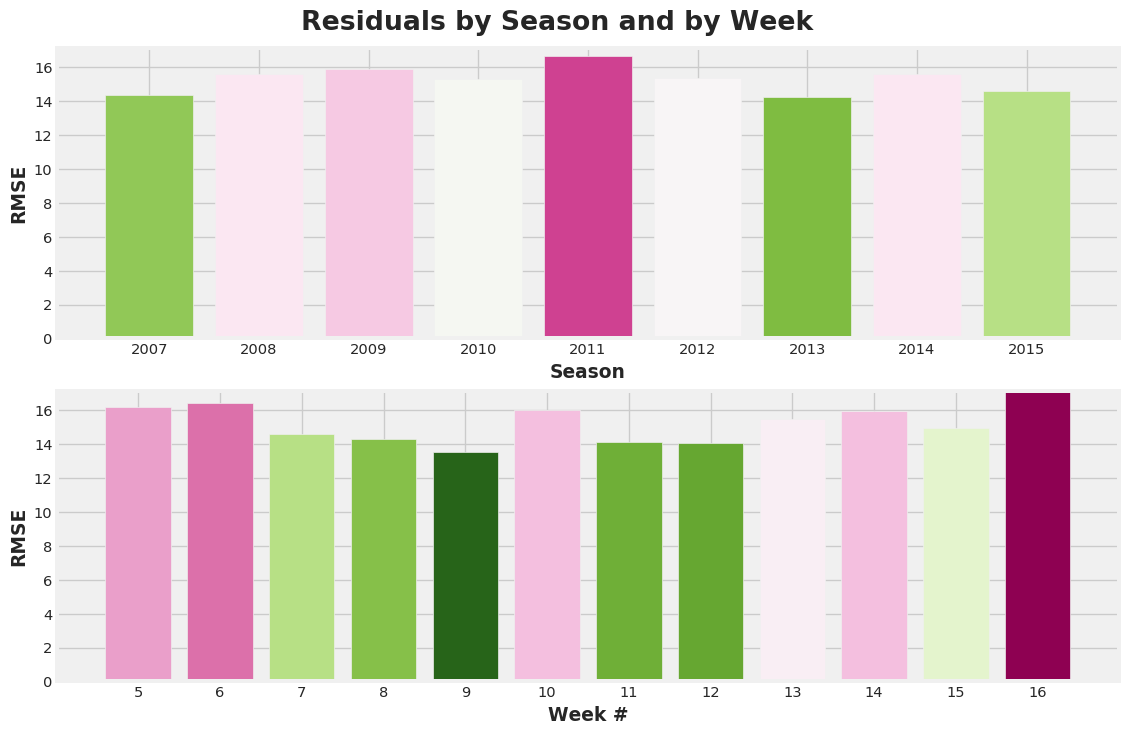

<Figure size 1152x768 with 0 Axes>

<Figure size 2304x2304 with 0 Axes>

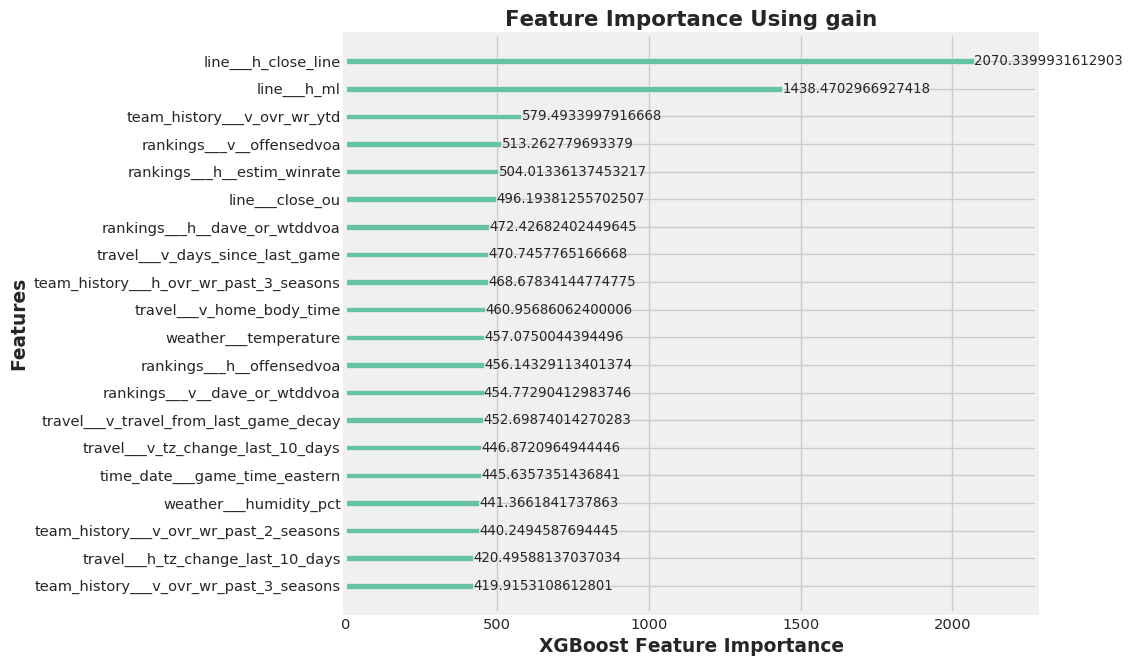

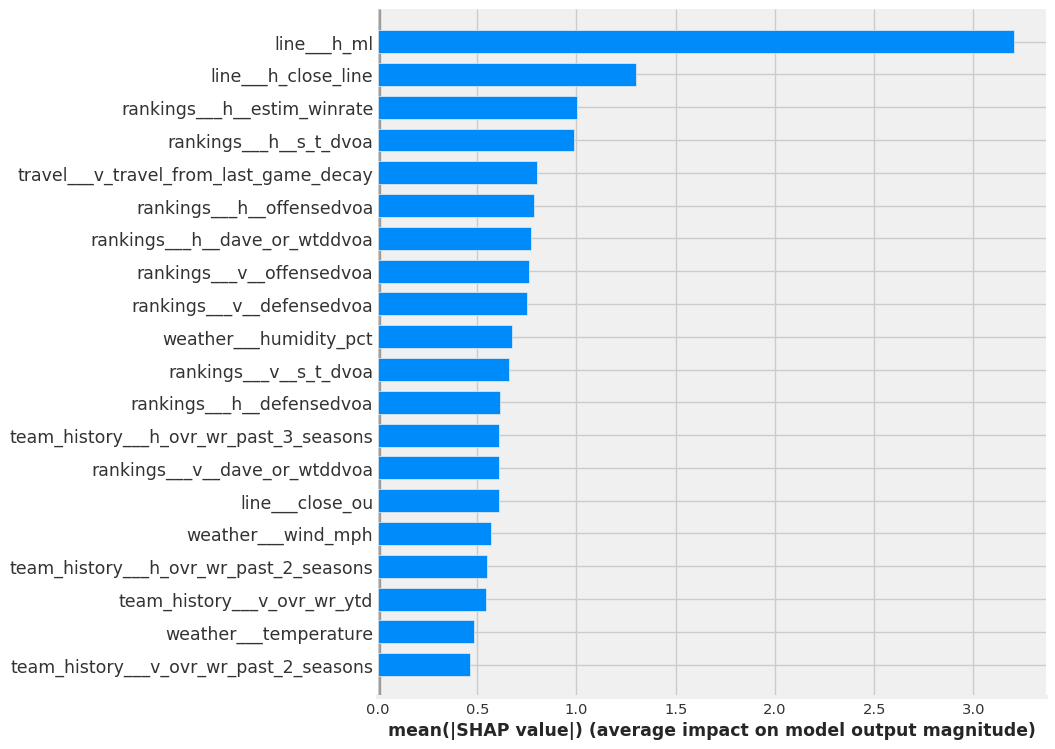

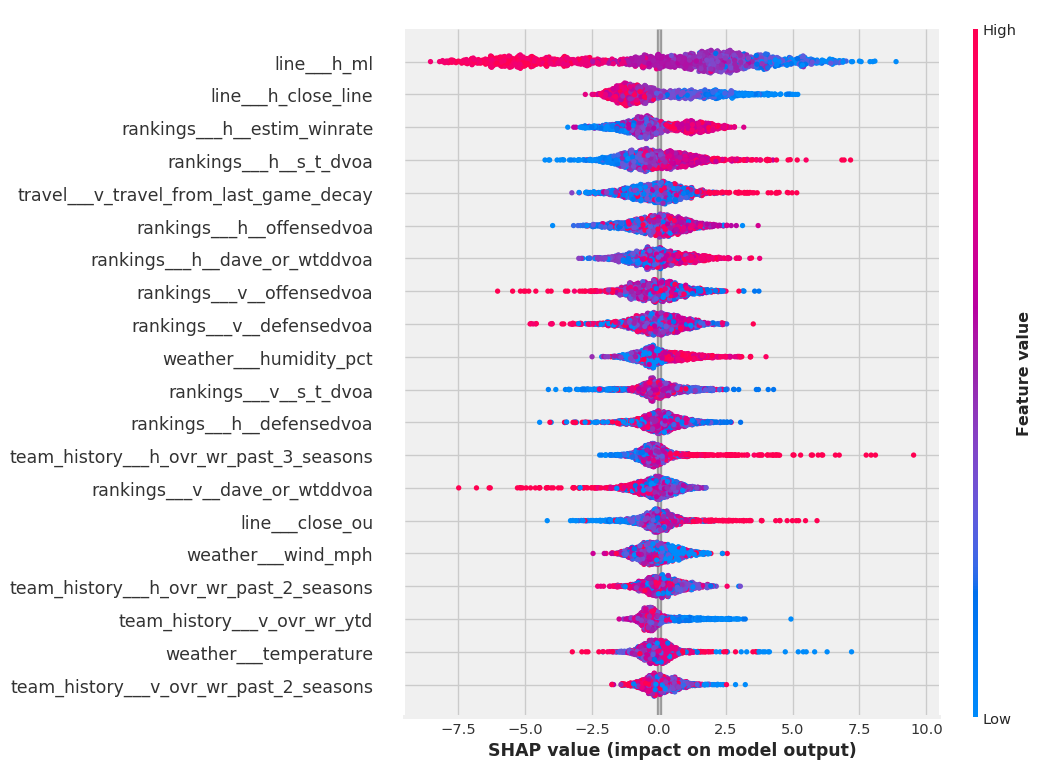

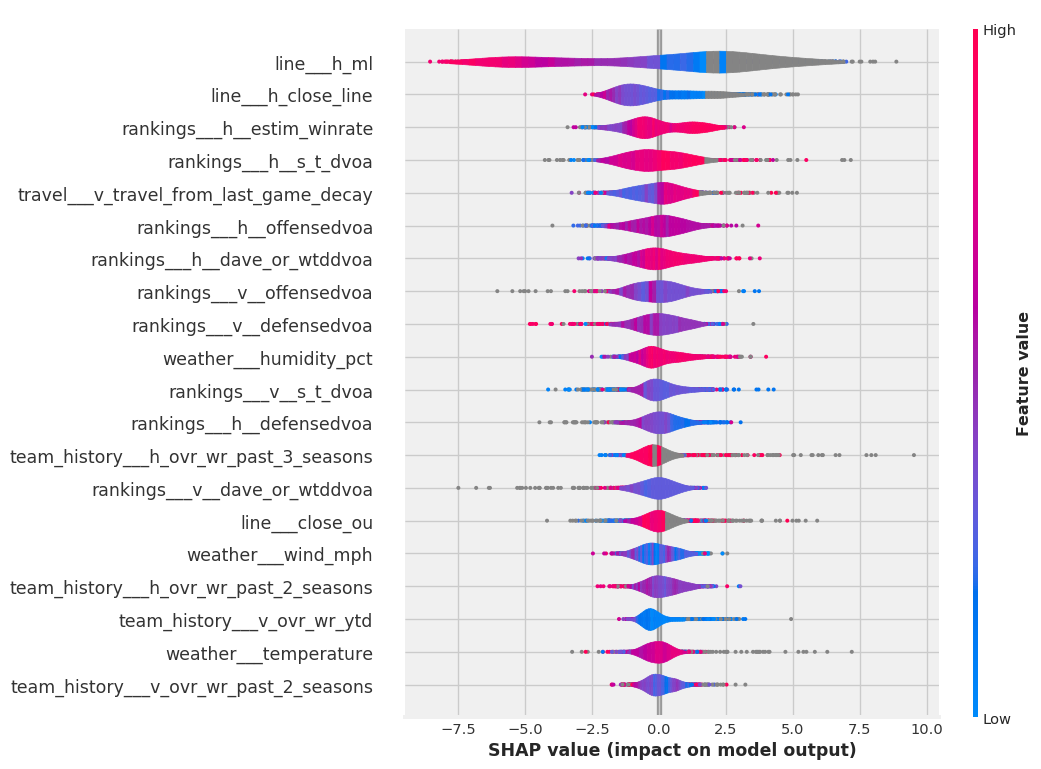

TypeError: plot_shap_force_plot() takes from 3 to 4 positional arguments but 6 were given

<Figure size 1152x768 with 0 Axes>

In [22]:
plots_dict['save_plots'] = False
plot = EvaluateAndPlot(plots_dict, model.cv_scores, model.is_classification)

plot.ridge_viz(ridge_df)
mpl.rcParams.update(params_backup)

for metric in plot.plots_dict['threshold_metrics']:
    plot.plot_by_threshold(acc_dfs[metric], metric)

for bin_type in plot.plots_dict['bin_types']:
    for nbins in plot.plots_dict['plot_bins']:
        inputs = (bins_dfs[bin_type][nbins], bin_type, nbins)
        plot.bin_viz(*inputs)
        if bin_type == 'Percentile':
            plot.bin_trend_viz(*inputs)
            
plot.plot_roc_kfold_errband(plot.get_roc_sets())
for col_range in plot.plots_dict['accuracy_at_topn'].keys():
    plot.accuracy_by_topn_viz(acc_topn[col_range], col_range)

plot.distributions_viz(vals)
plot.scatter_viz(scatter)
plot.confusion_matrix_viz(confusion_df)
plot.residuals_by_season_week_bars_viz(mean_residuals, plot_cols=2)
plot.residuals_by_season_week_heatmap_viz(pivot_residuals)
plot.residuals_by_season_week_bars_agg_viz(mean_residuals, residuals)

plot.plot_feature_importances(model.model_objects['full'])

shap.initjs()
plot.plot_shap_feature_importance(model.model_dict, model.cv_scores, model.model_objects, shap_df)

games = model.cv_scores.index[10]
plot.plot_shap_force_plot(games, model.model_dict, model.cv_scores, model.model_objects, shap_df)

games = model.cv_scores.index[:10]
plot.plot_shap_force_plot(games, model.model_dict, model.cv_scores, model.model_objects, shap_df)

plot.plot_shap_dependence(model.model_dict, model.model_objects, model.cv_scores, shap_df)

stopwatch.add('evaluate: plots-only and displayed in jupyter')

In [ ]:
stopwatch.write('models/dev/time-stats.csv')

In [130]:
!open {plot.plots_dir}

In [ ]:
!open models/dev

In [ ]:
foo

## Next Steps:

### Bagging -- Ensemble
* bagged feature importance

### Optimization

### Prep Data
* transform labels
* impute
* correlations
* feature interactions, kernel, etc

### New stats/features
* PFF
* Sharp

### "Where do we miss?" in Evaluation??
* week id (done for regression -- do for classification)
* season
* team?
* by spread, ML
* by O/U

### Figure out how to do week 1, older years, etc.
* maybe simpler model that doesn't have things like DVOA... can train on all the data, and use to score week 1

### Figure out what to do about which rows to use, how to do the home vs. visitor... possibly as part of the CleanseData class

### remove autocorrelations from labels, train on that, then re-transform

### Feature importance still possible TODO
* find any other permutation importance? https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
* LIME
* use the old sklearn feature importance plots to plot the other importances rather than the builtin ones